In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import pickle
from scripts.plot_marginals import plot_dataframe_marginal_comparison

ModuleNotFoundError: No module named 'scripts'

In [5]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
SYN_DATA_FOLDER = os.path.join(CURRENT_FOLDER, "data", "synt_datasets")
DATASETS_FOLDER = os.path.join(CURRENT_FOLDER, "data", "datasets")

In [16]:
binary3d_df = pd.read_csv(os.path.join(DATASETS_FOLDER, 'binary3d.csv'))
binary4d_df = pd.read_csv(os.path.join(DATASETS_FOLDER, 'binary4d.csv'))

In [21]:
sys.path.append(CURRENT_FOLDER)

In [36]:
def numpy_tensor_to_dataframe_list(np_tensor, columns=None):
    # Assuming tensor shape (n_dataframes, n_rows, n_features)
    # Produce list with n_dataframes elements with array shaped (n_rows, n_features)
    
    df_list = []
        
    for i in range(np_tensor.shape[0]):
        array_slice = np_tensor[i]
        df = pd.DataFrame(array_slice, columns=columns)
        df_list.append(df)
        
    return df_list

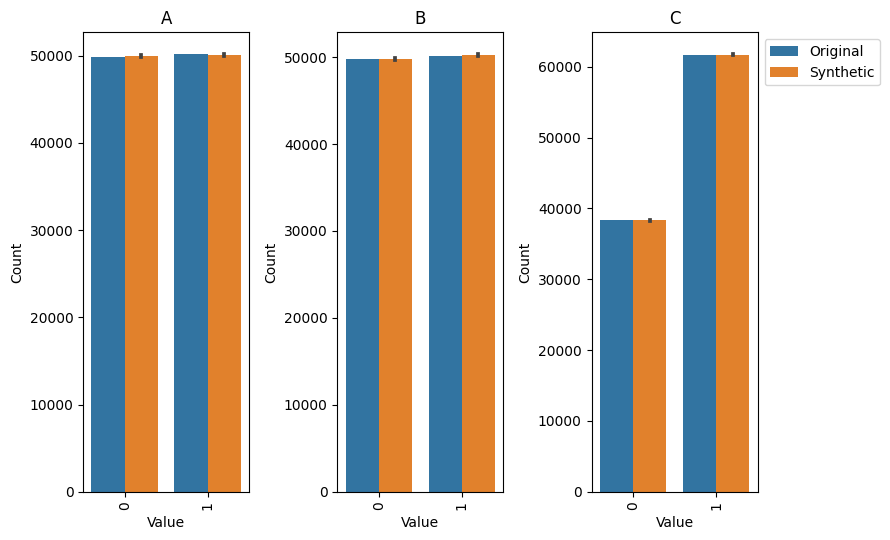

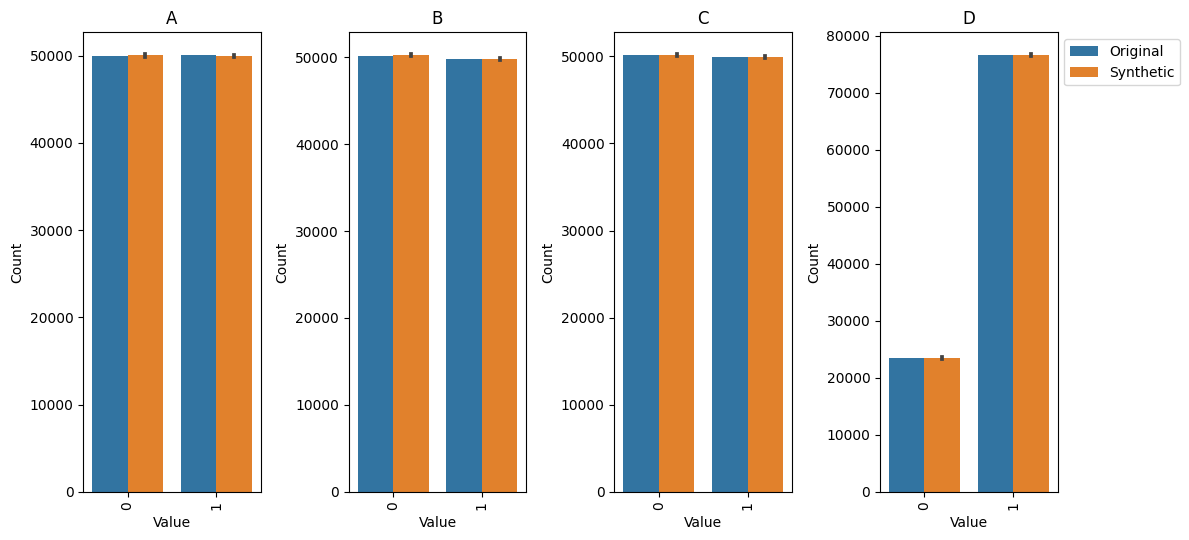

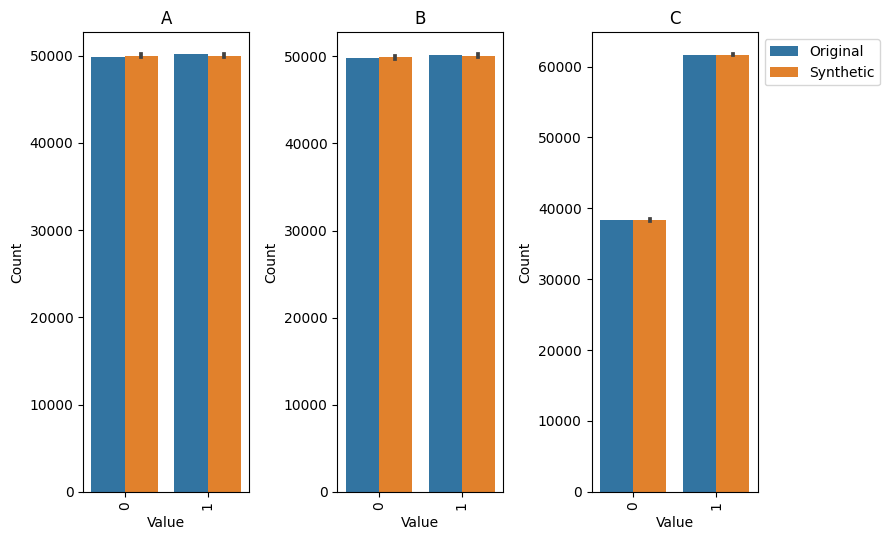

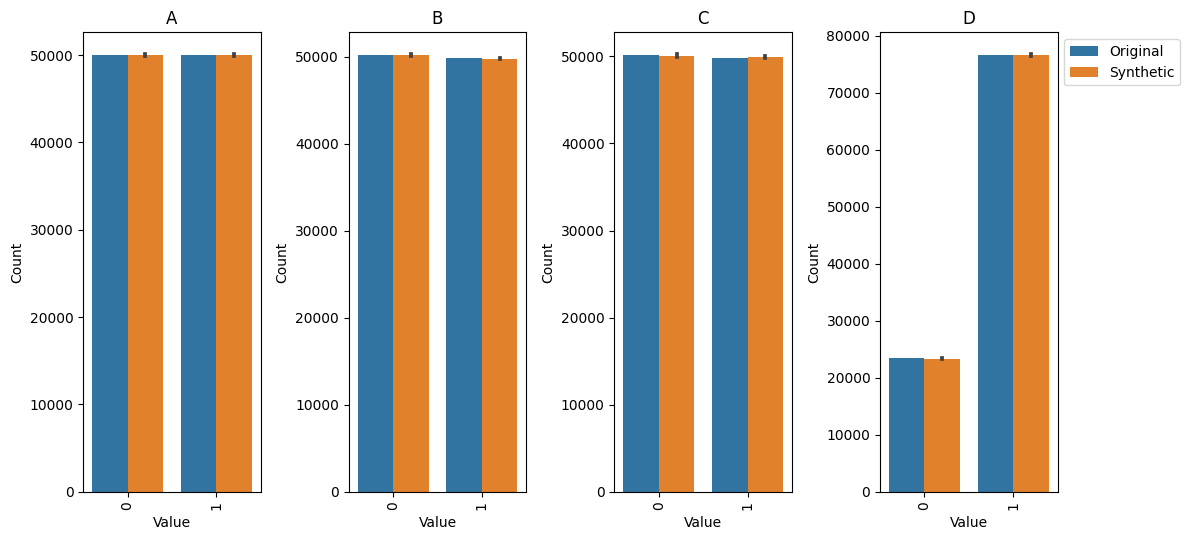

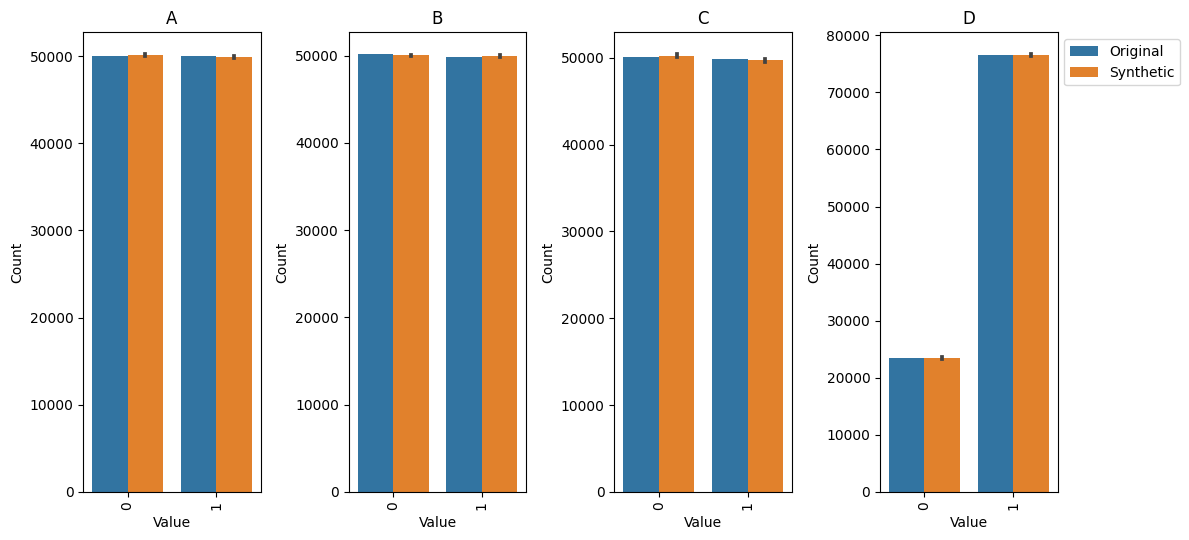

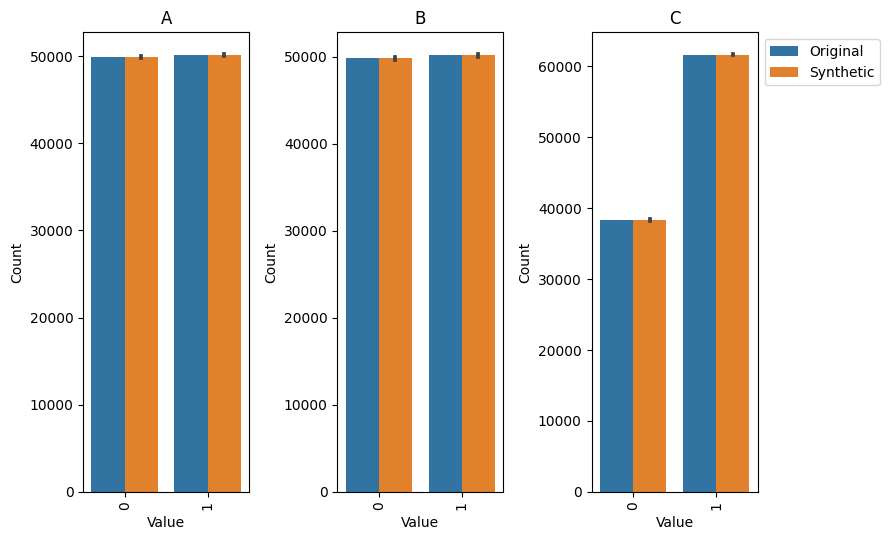

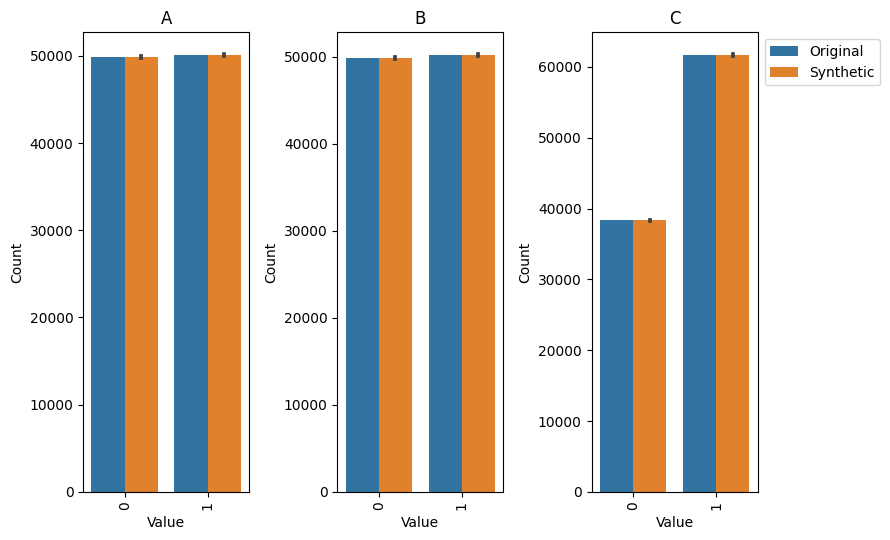

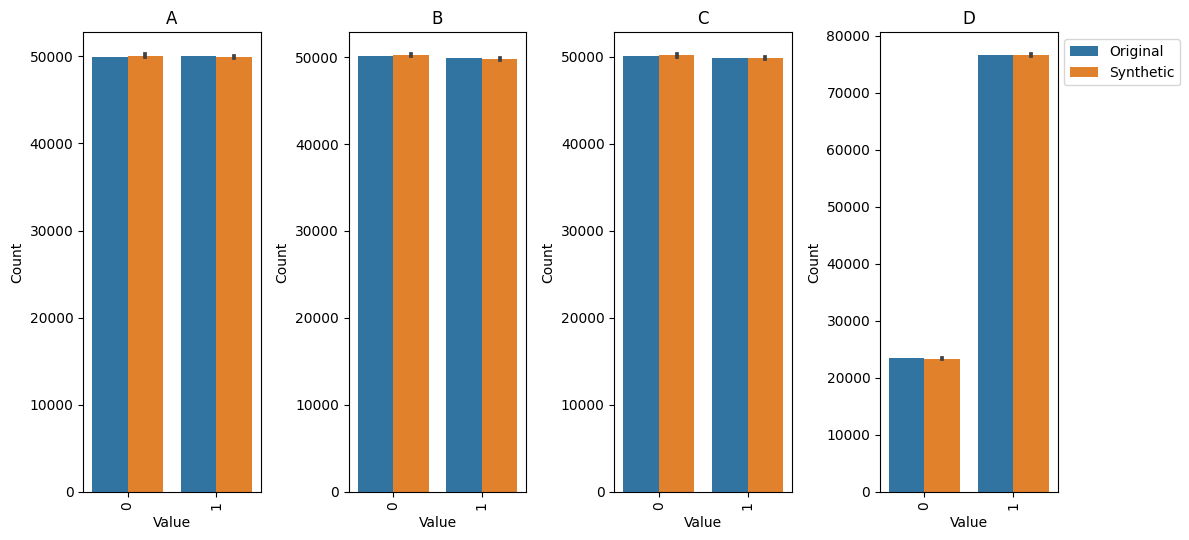

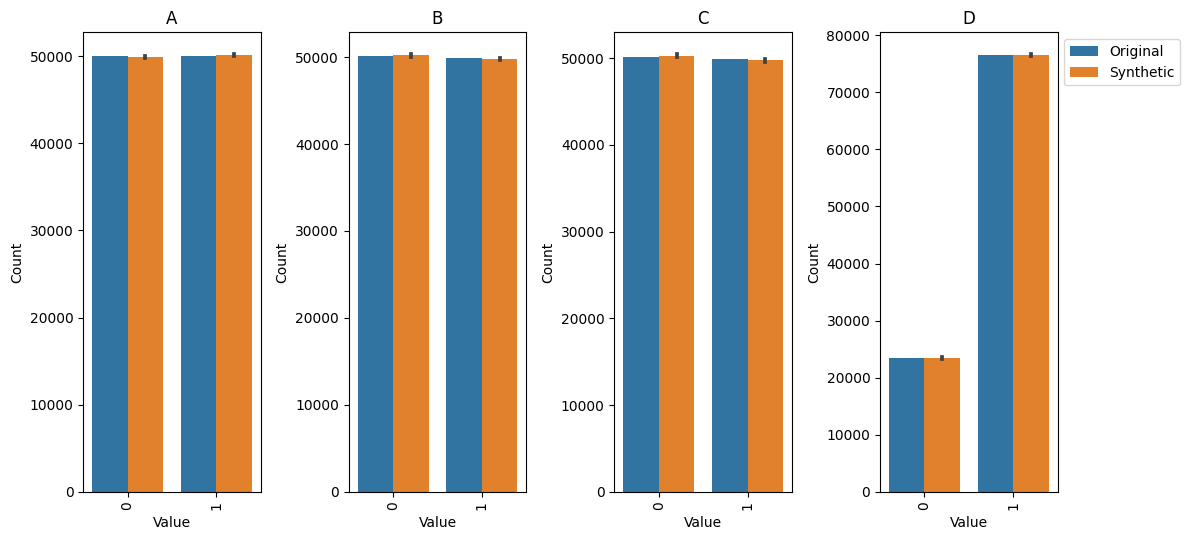

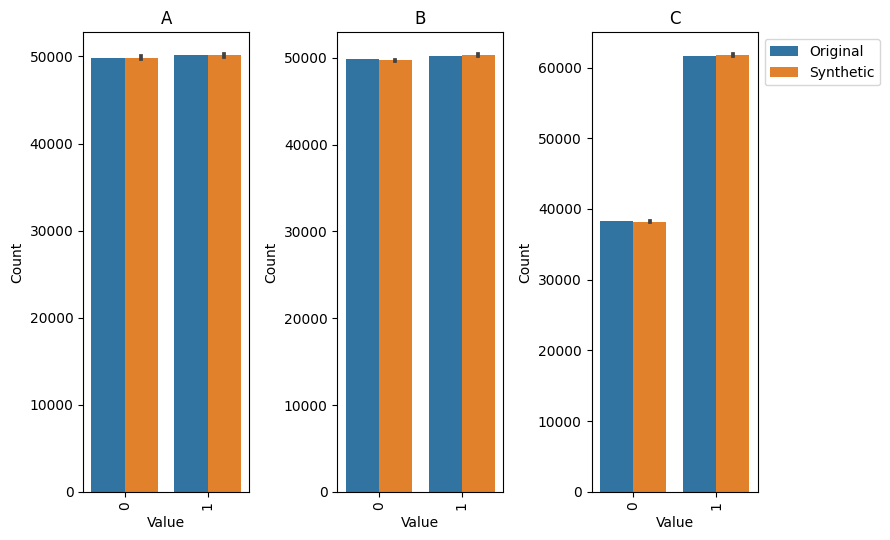

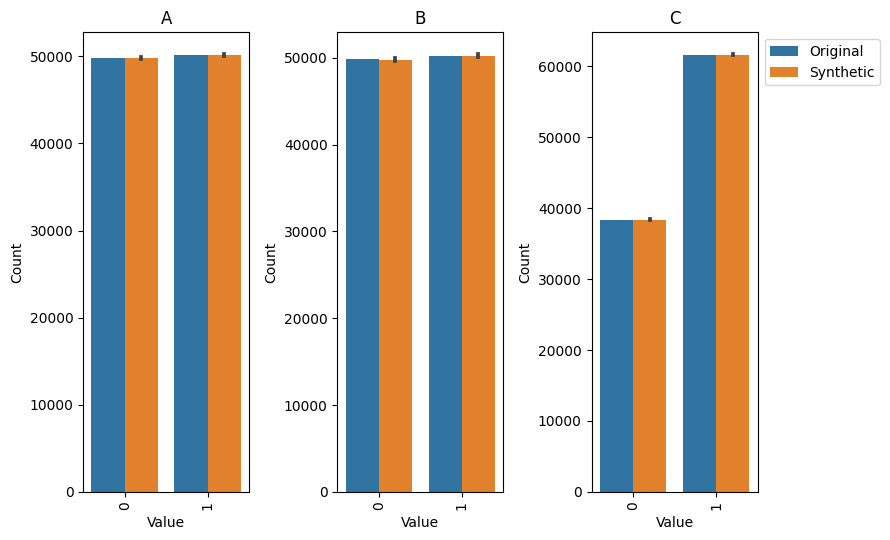

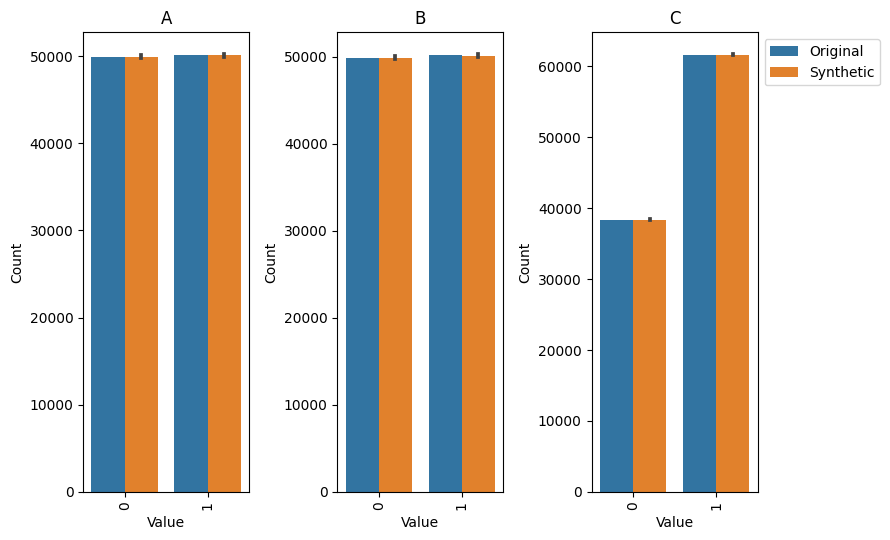

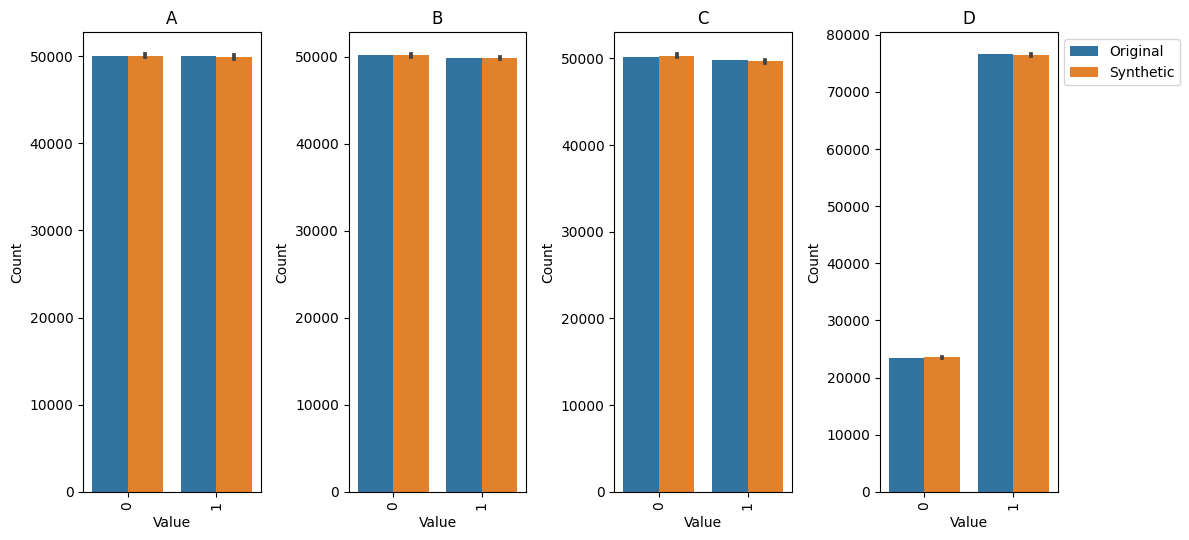

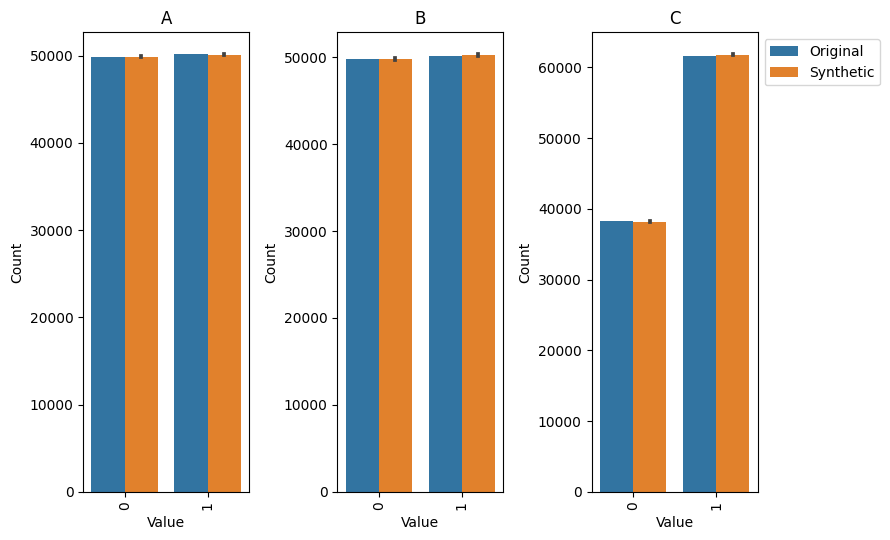

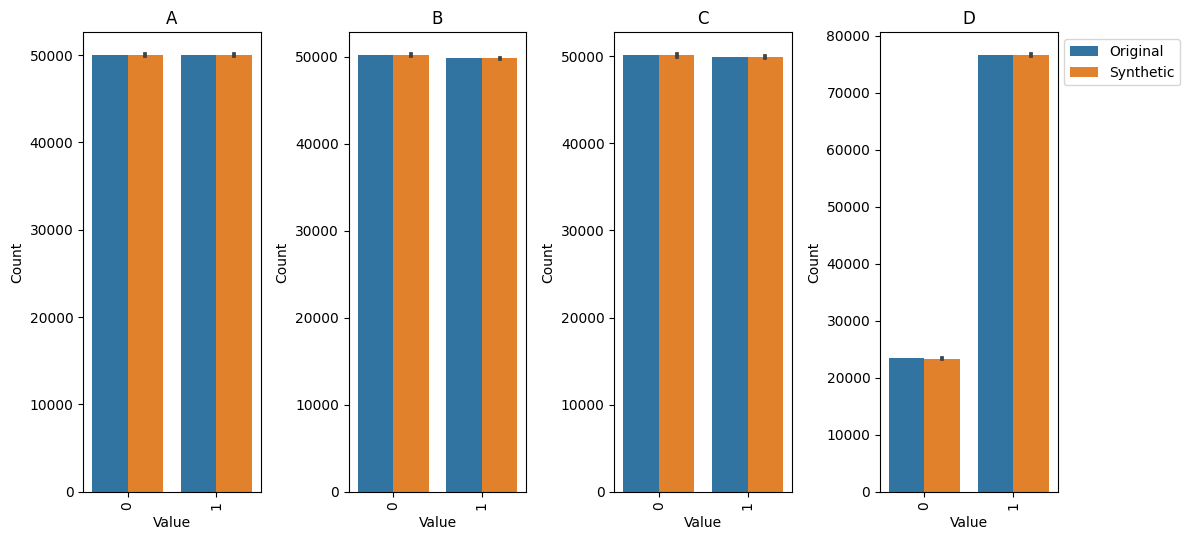

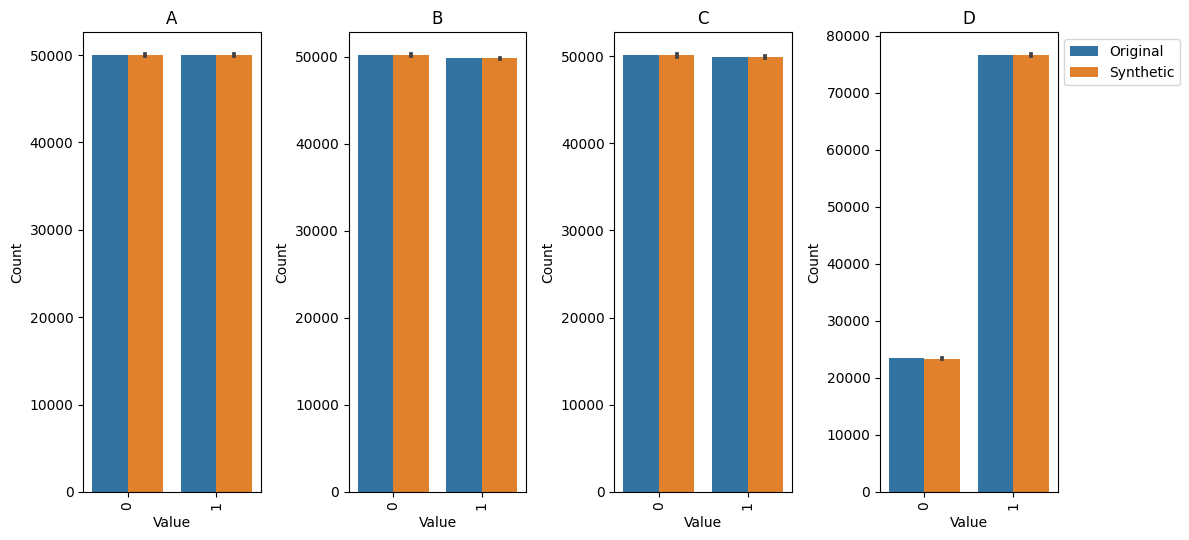

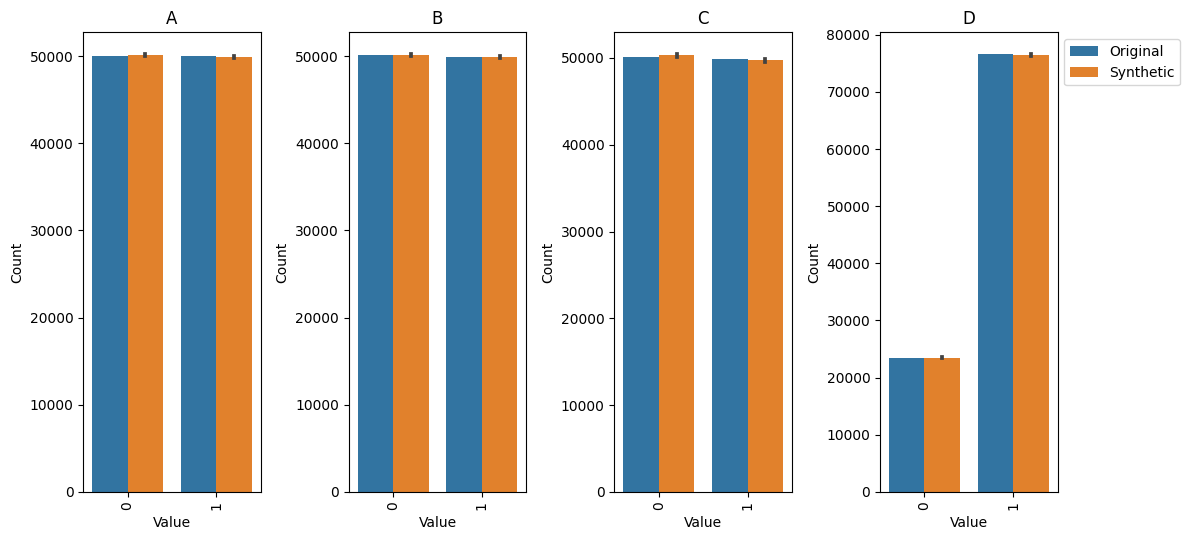

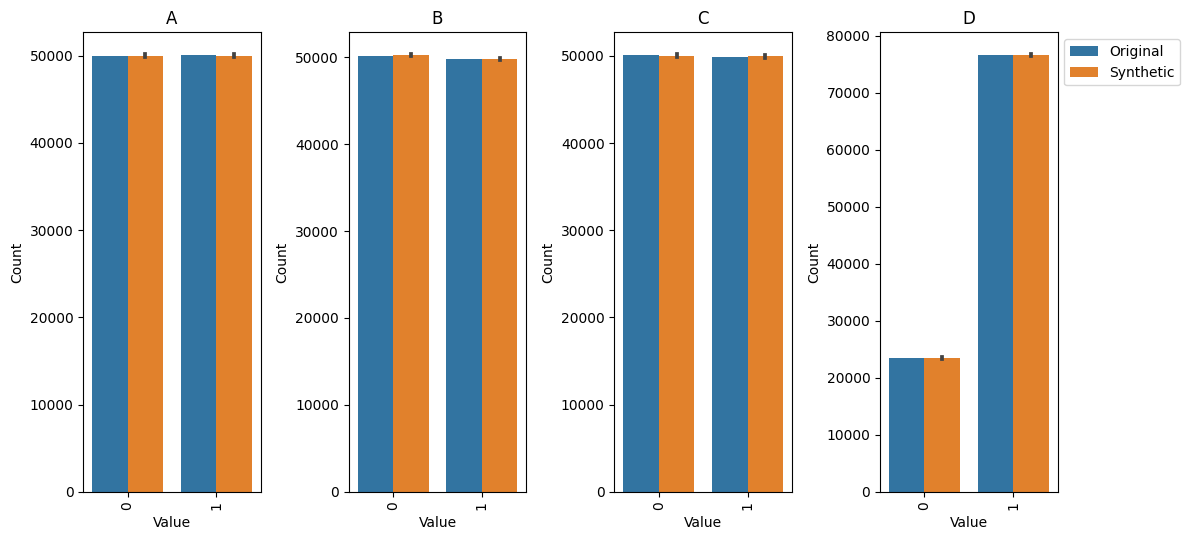

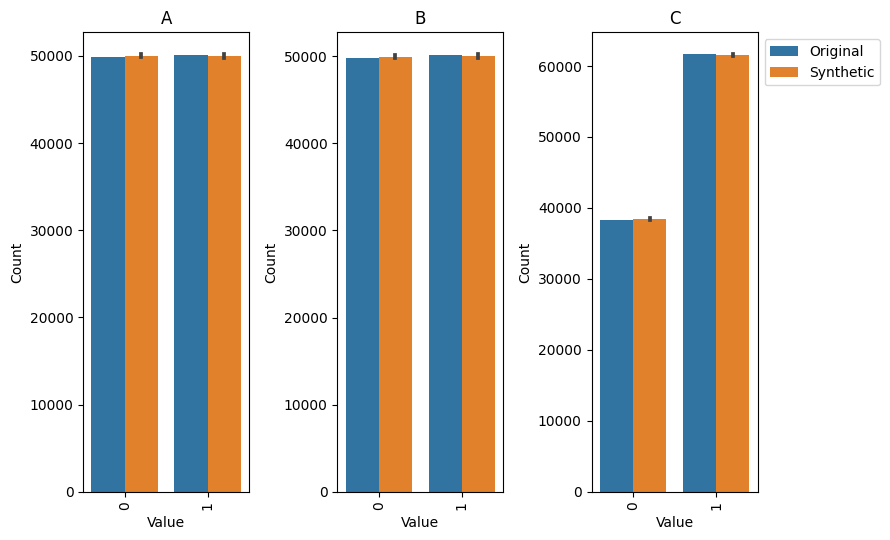

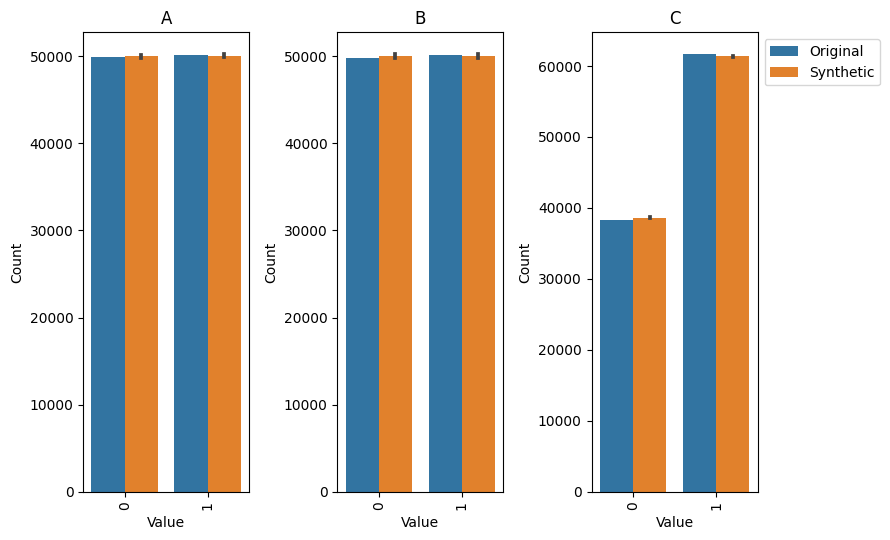

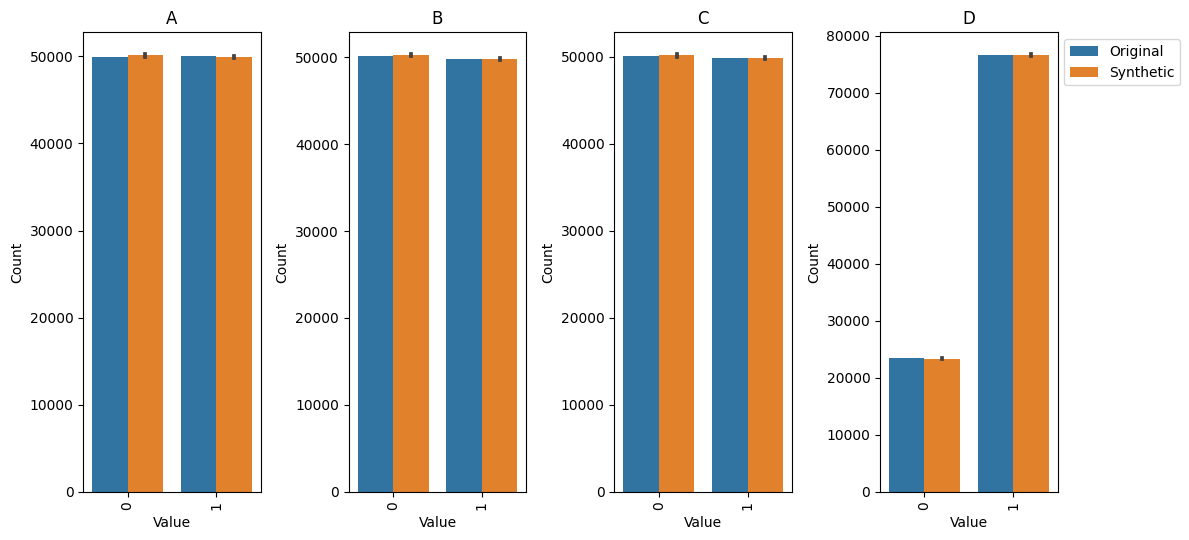

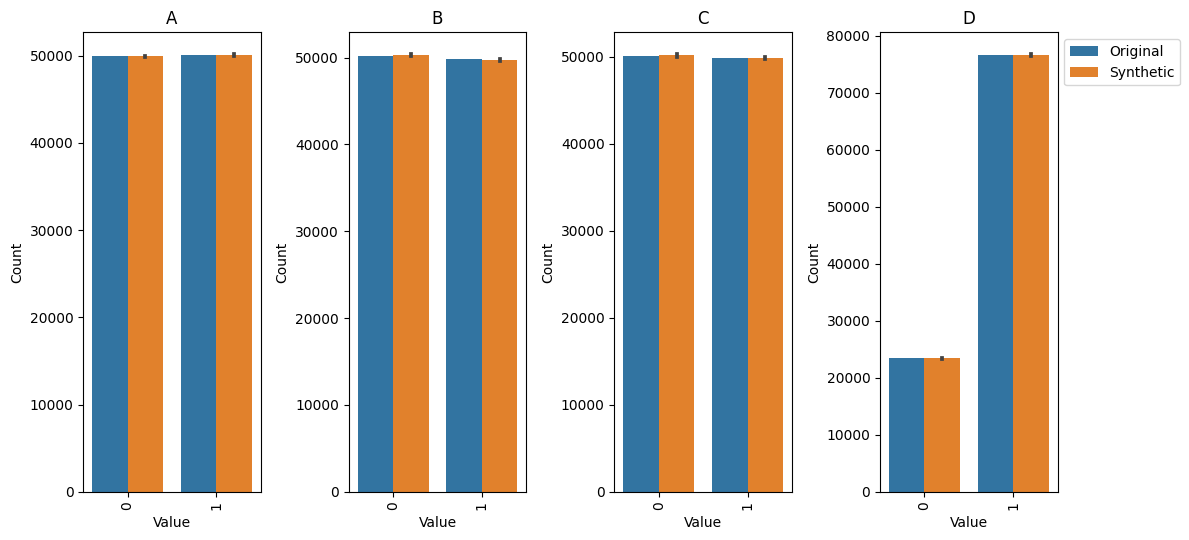

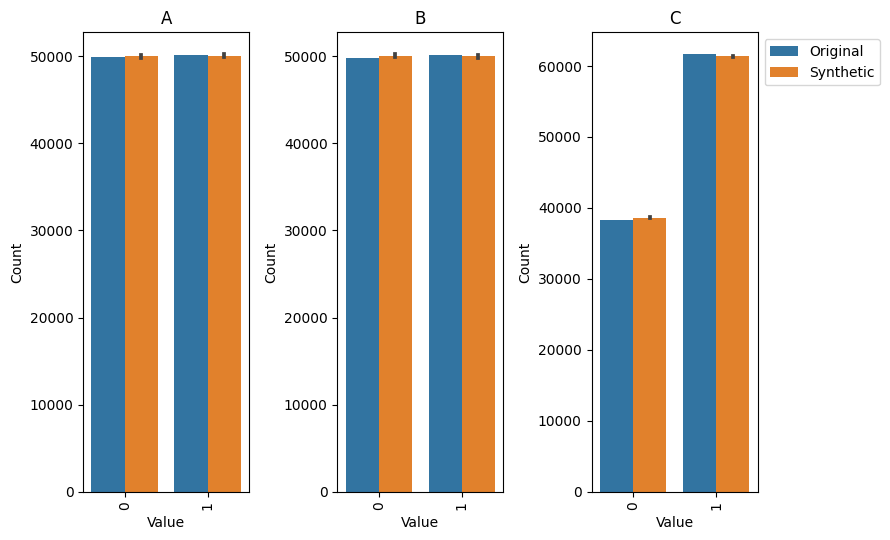

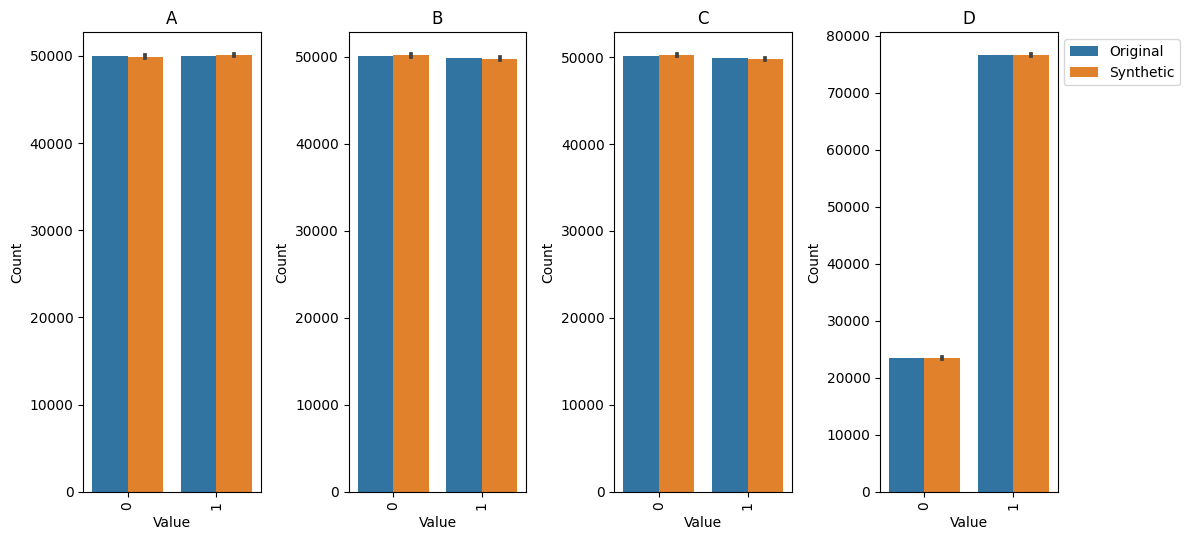

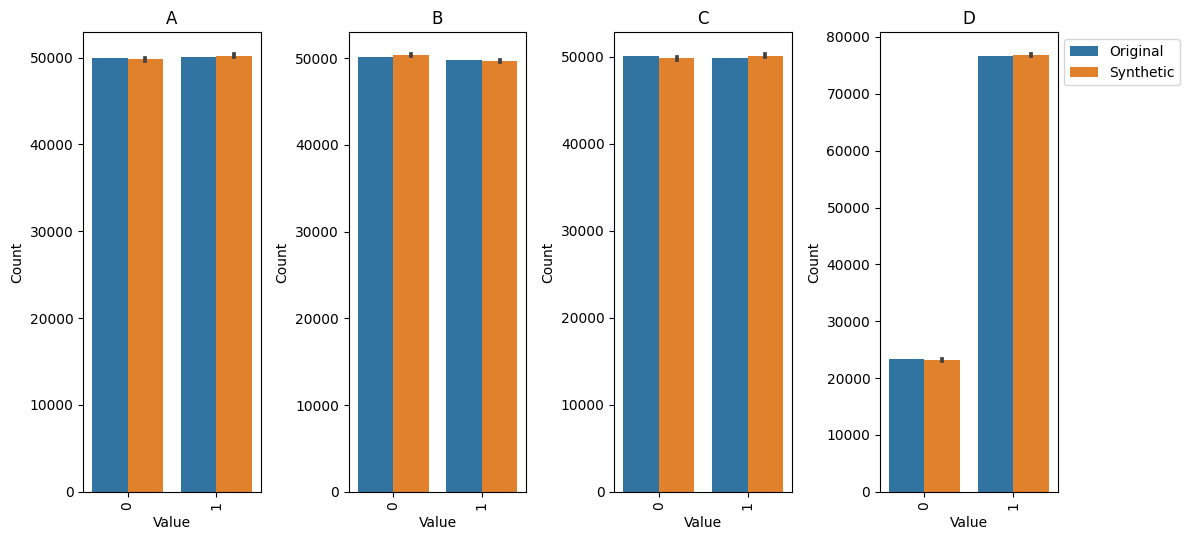

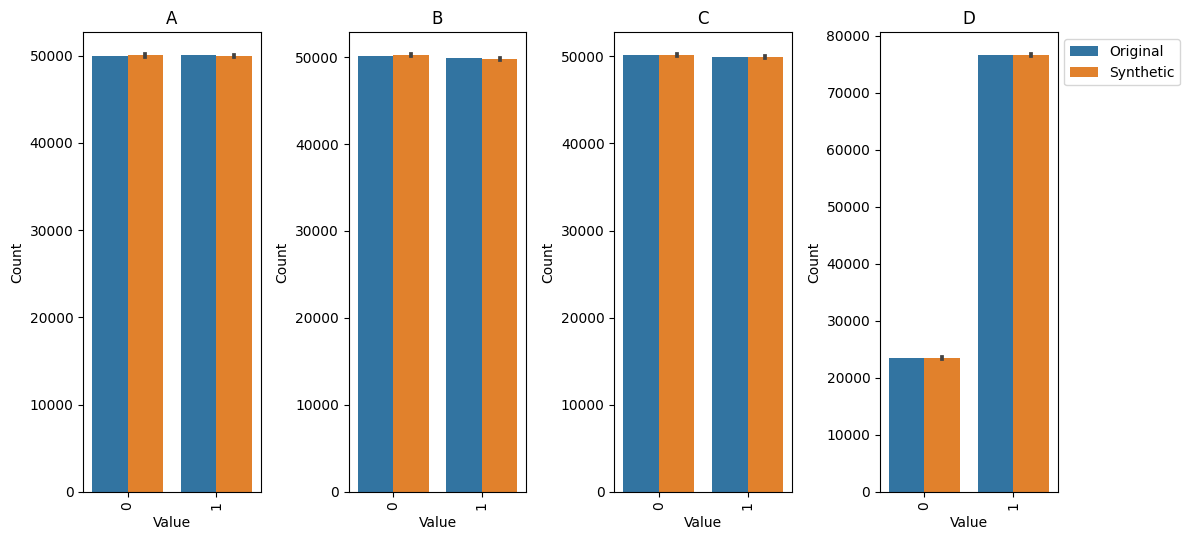

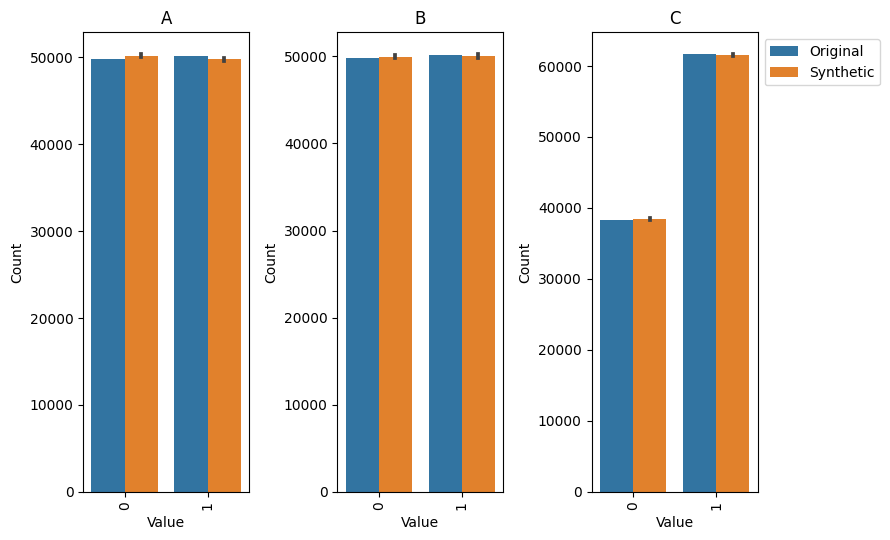

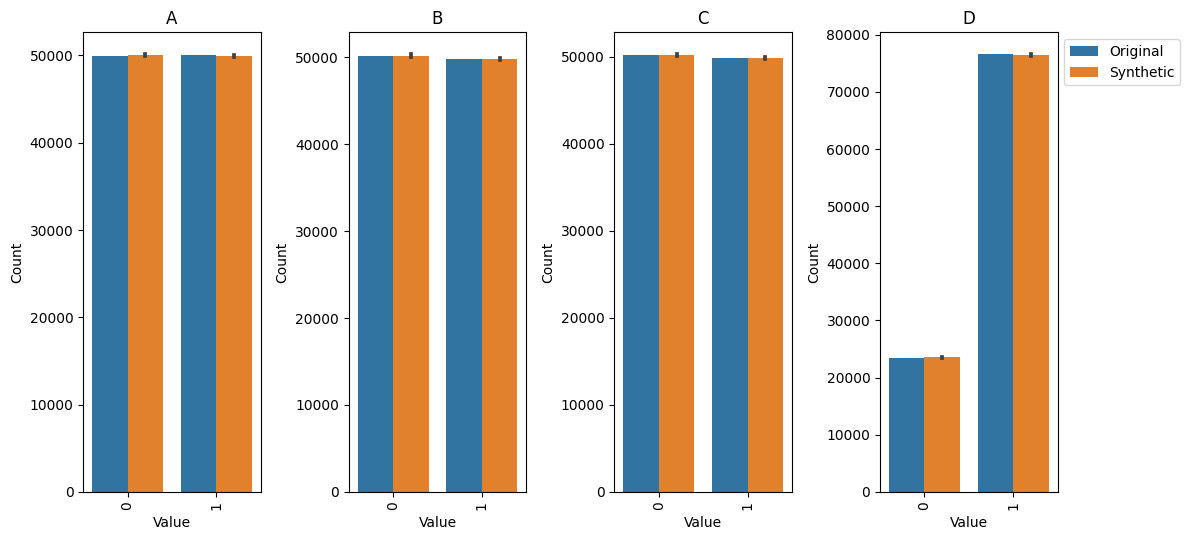

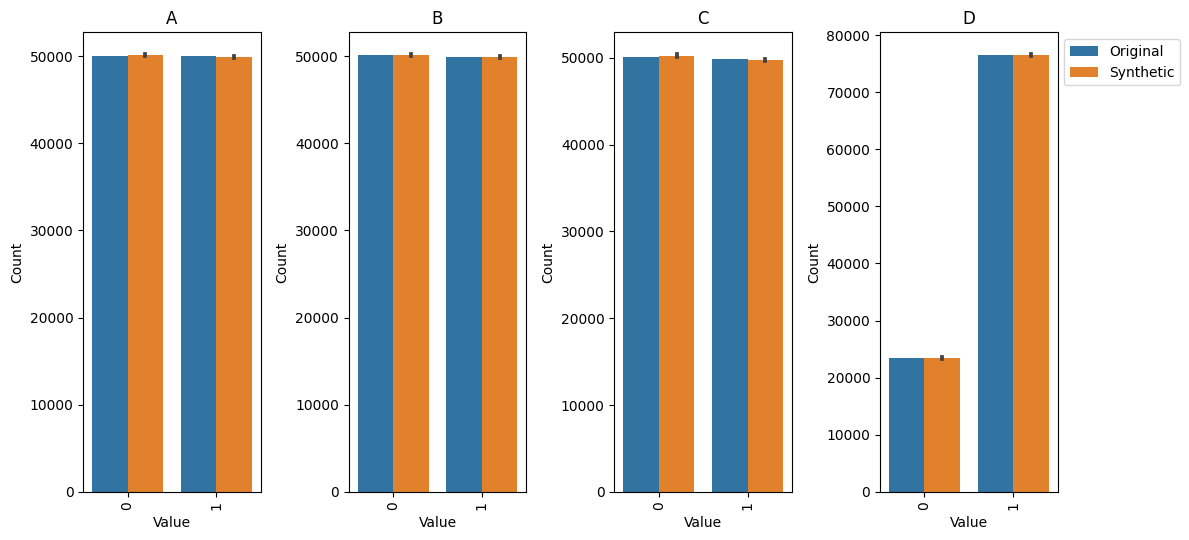

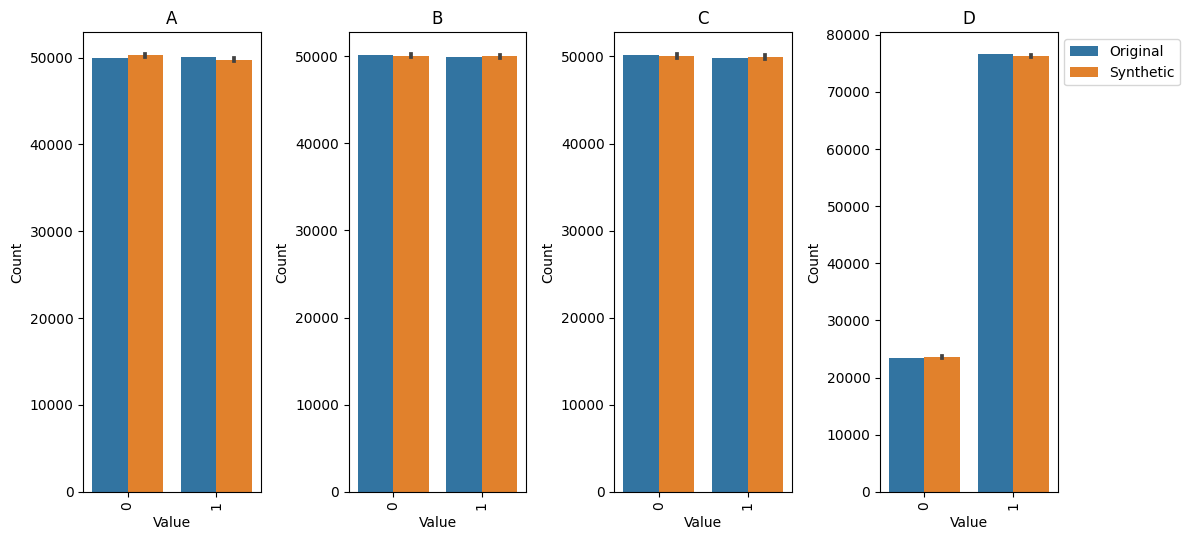

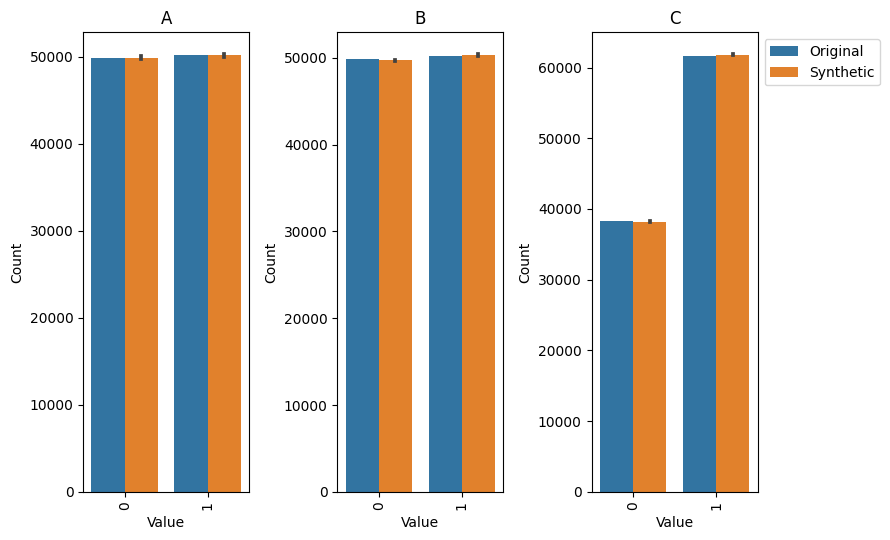

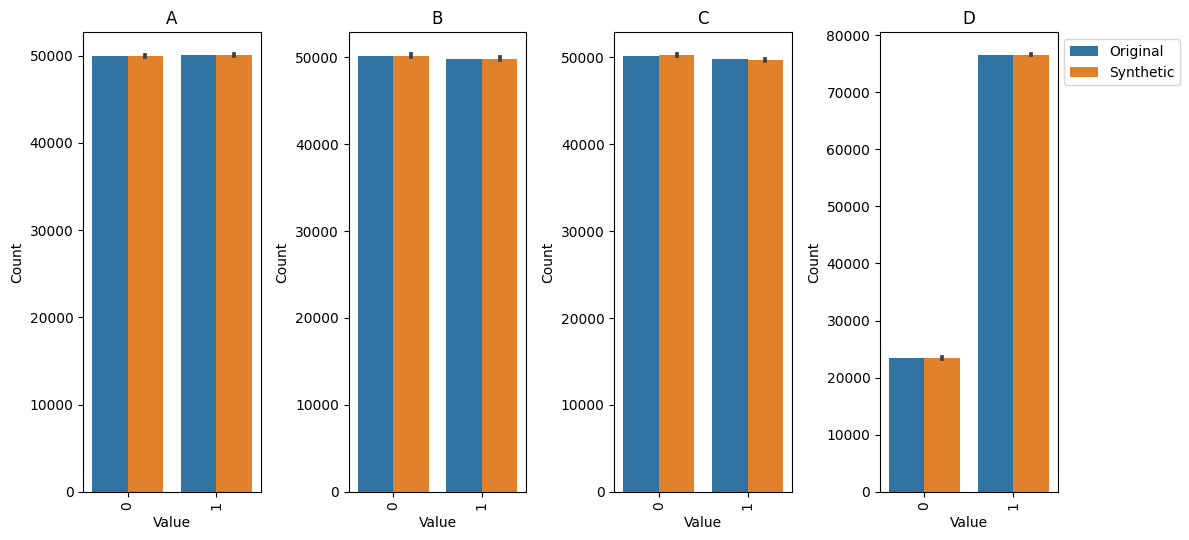

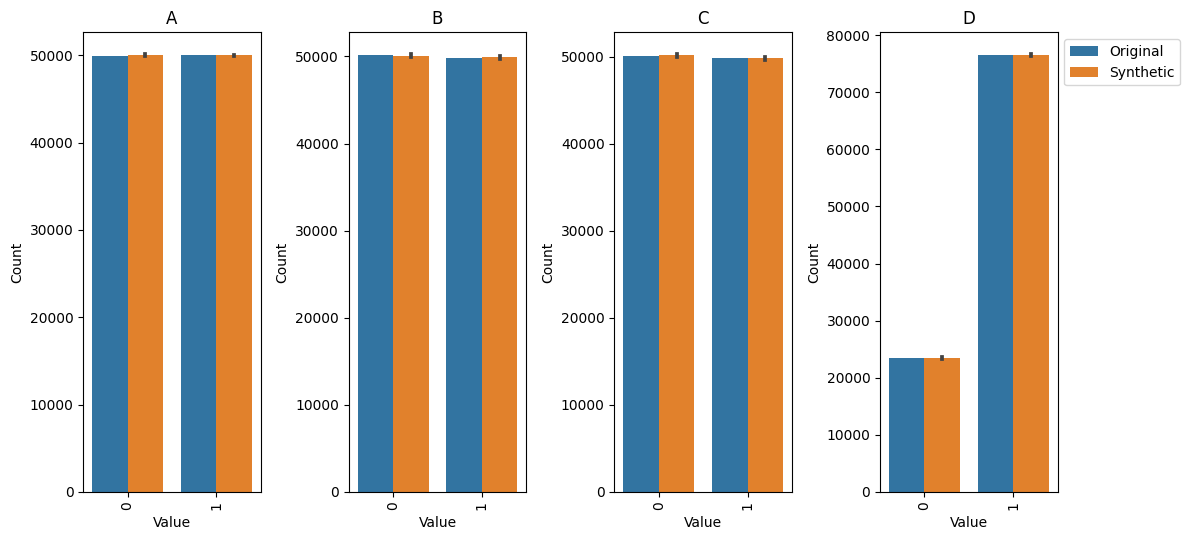

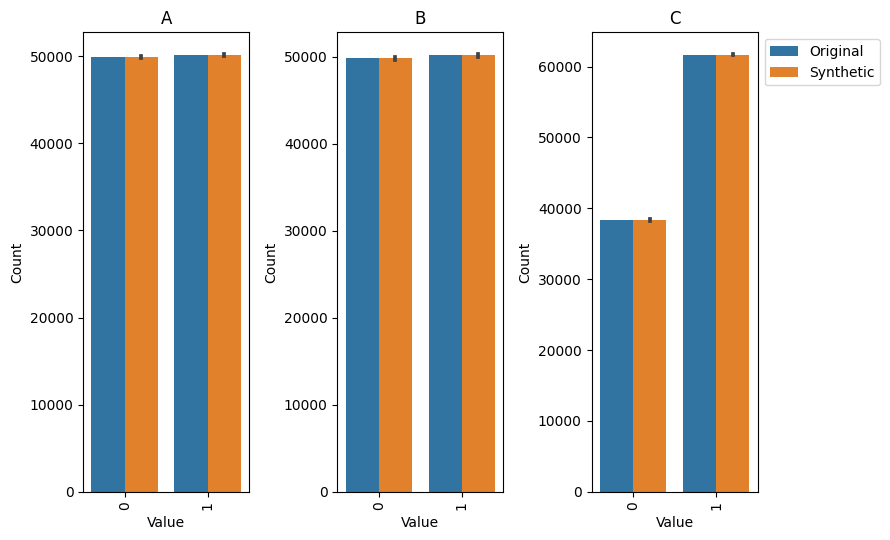

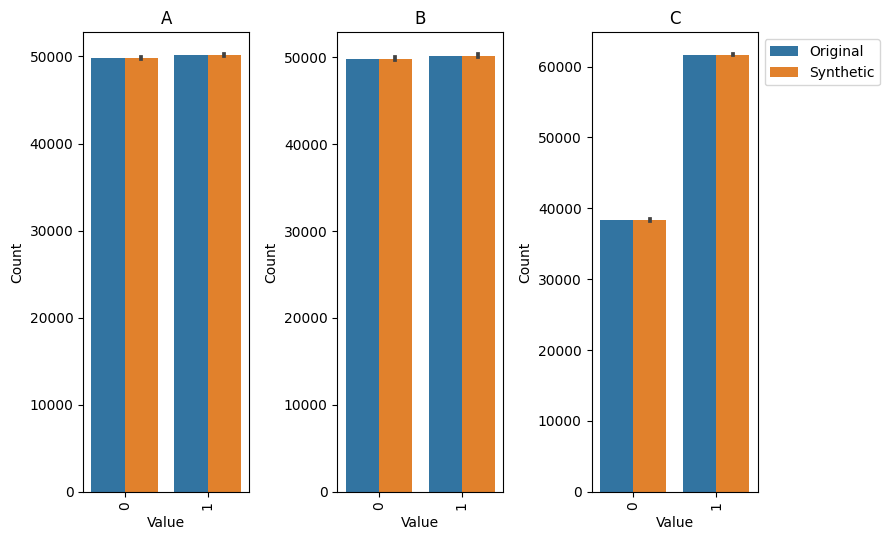

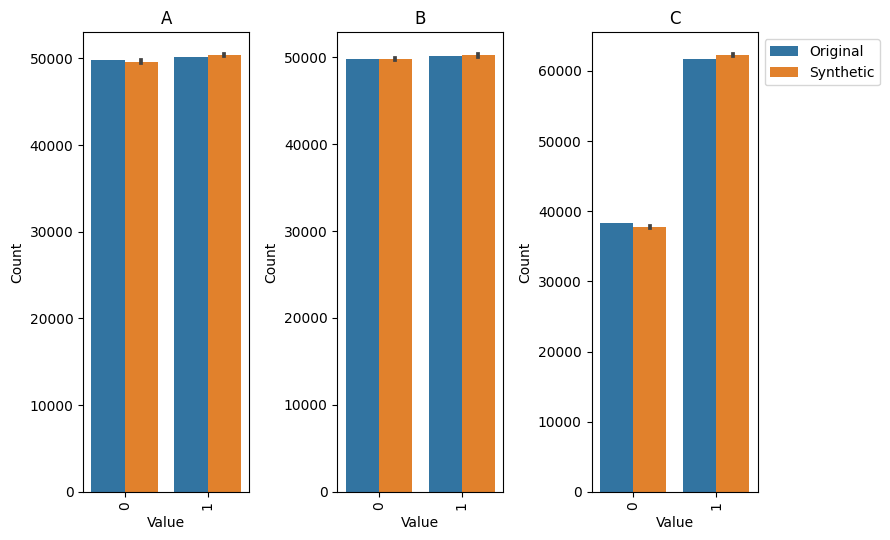

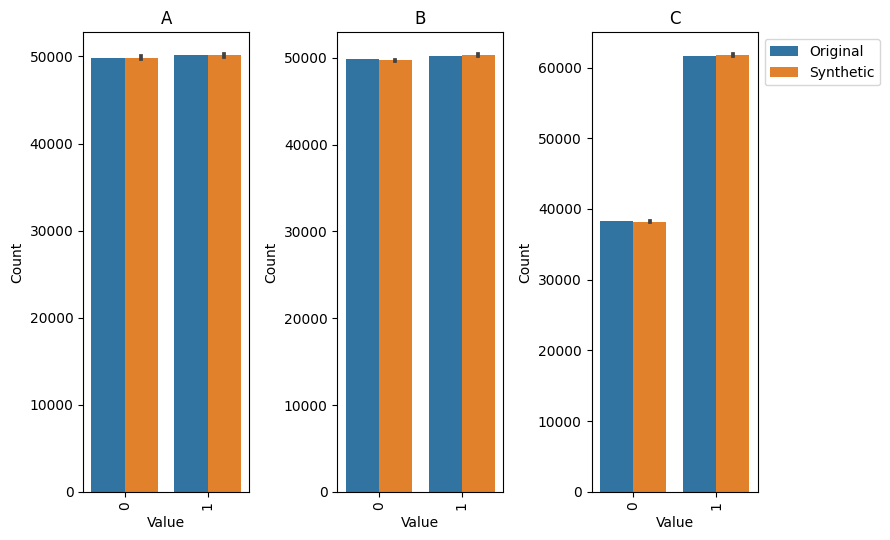

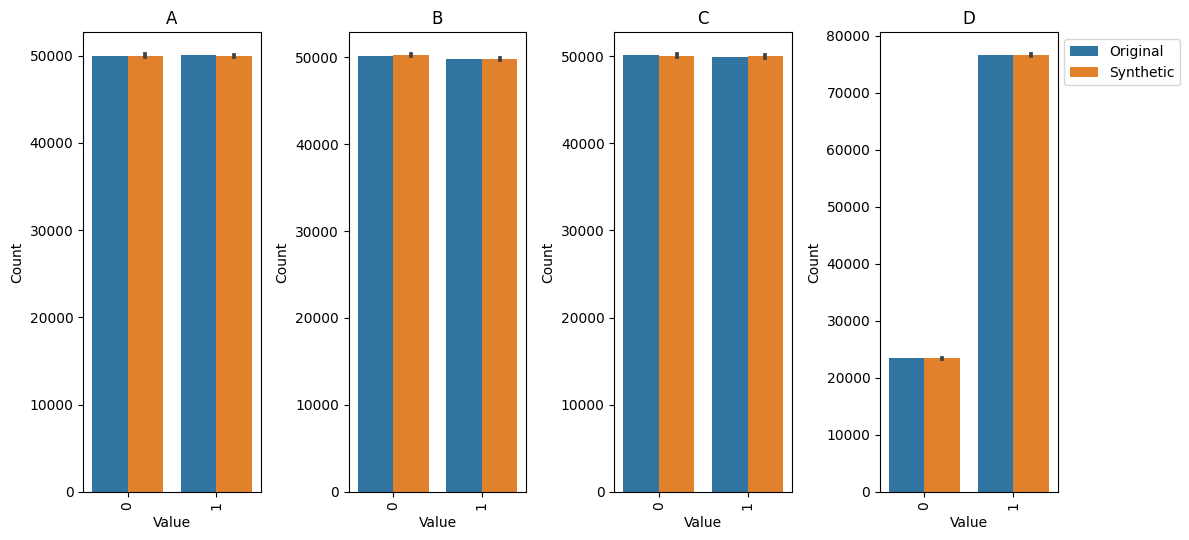

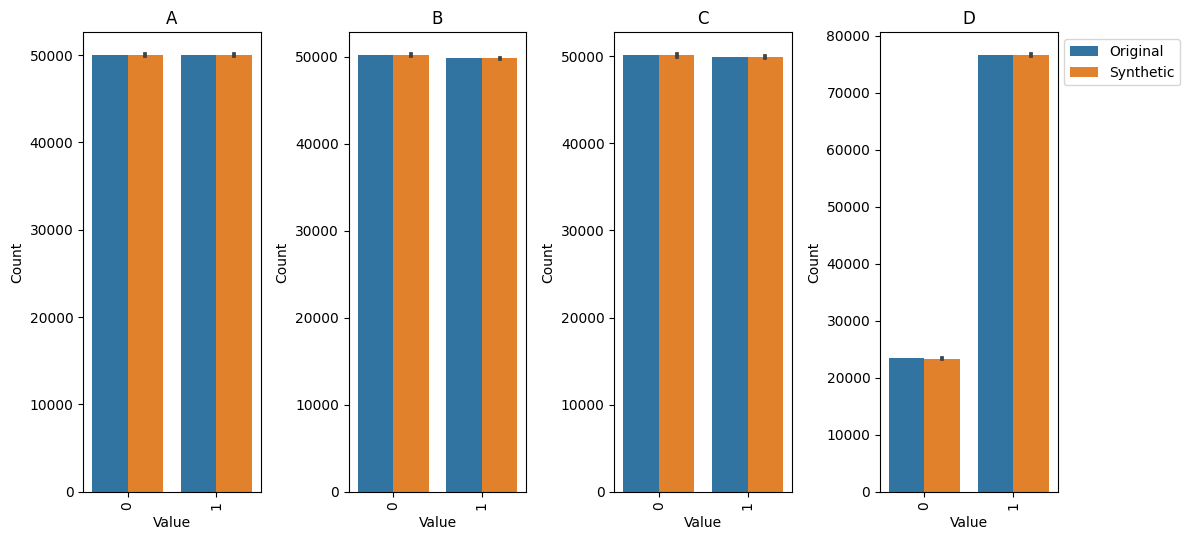

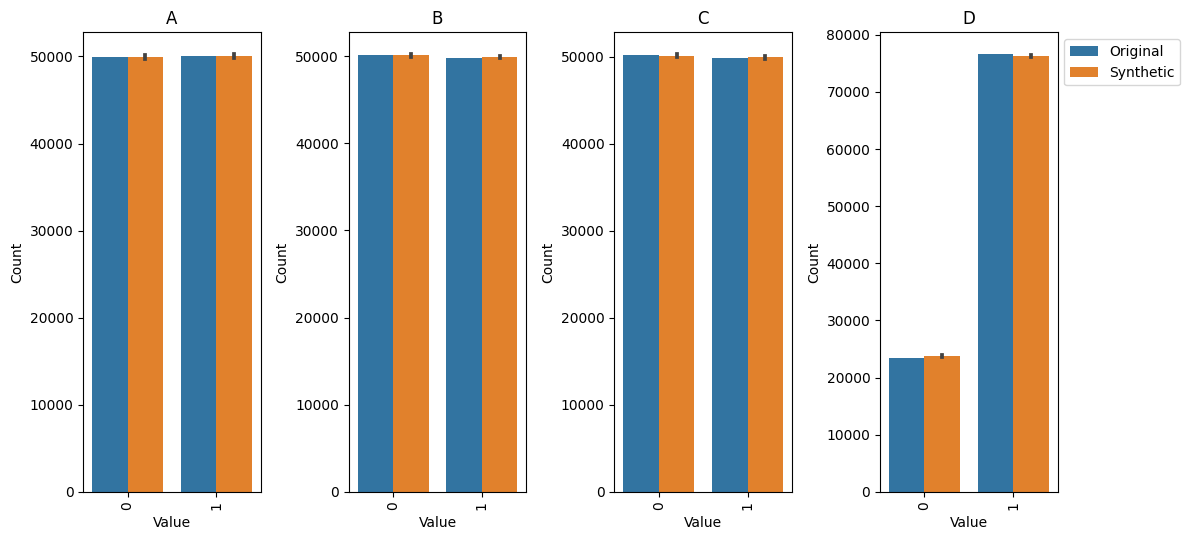

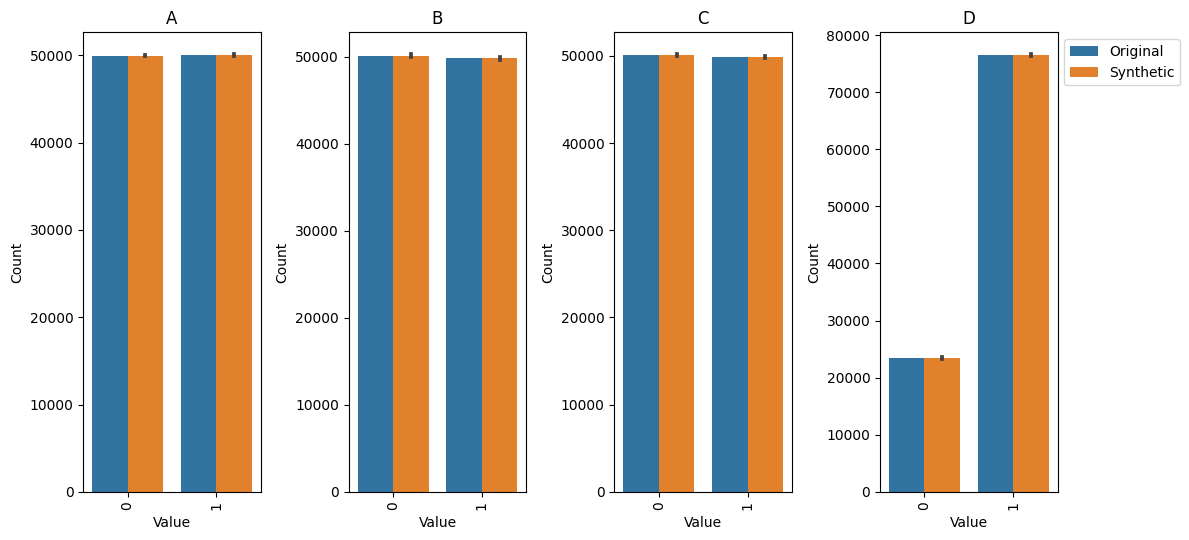

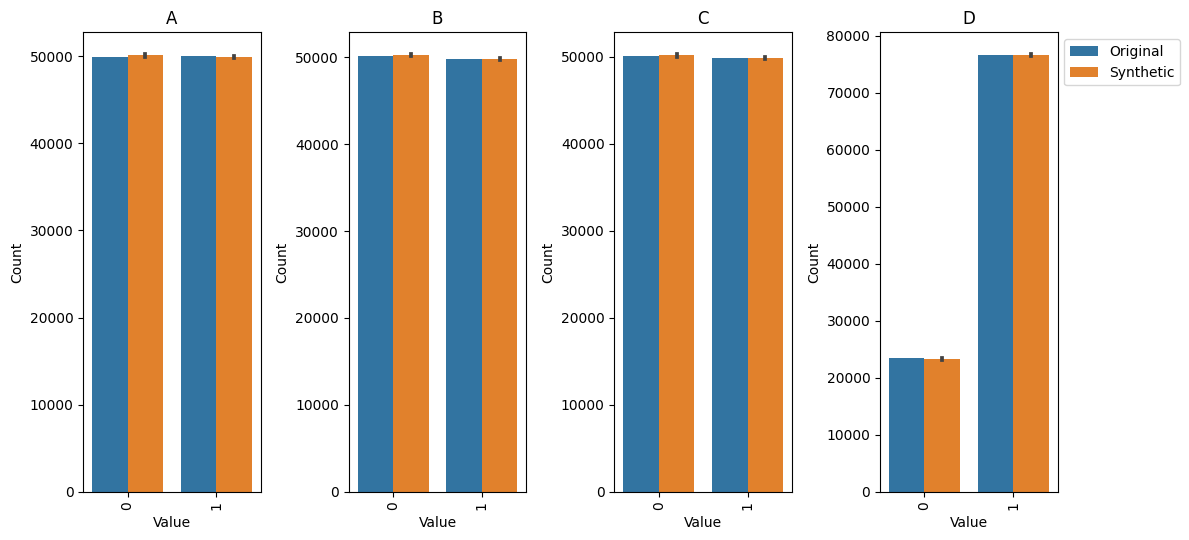

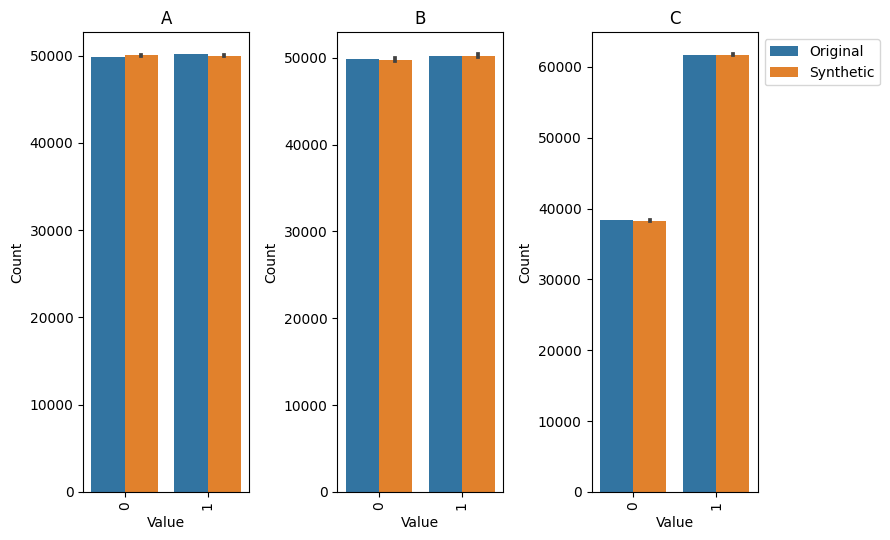

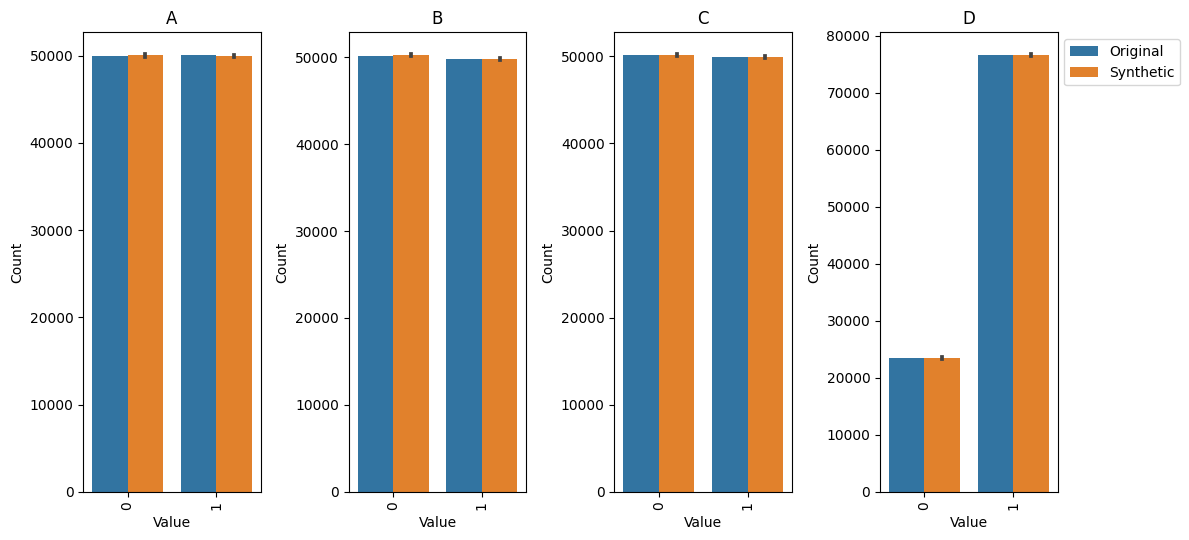

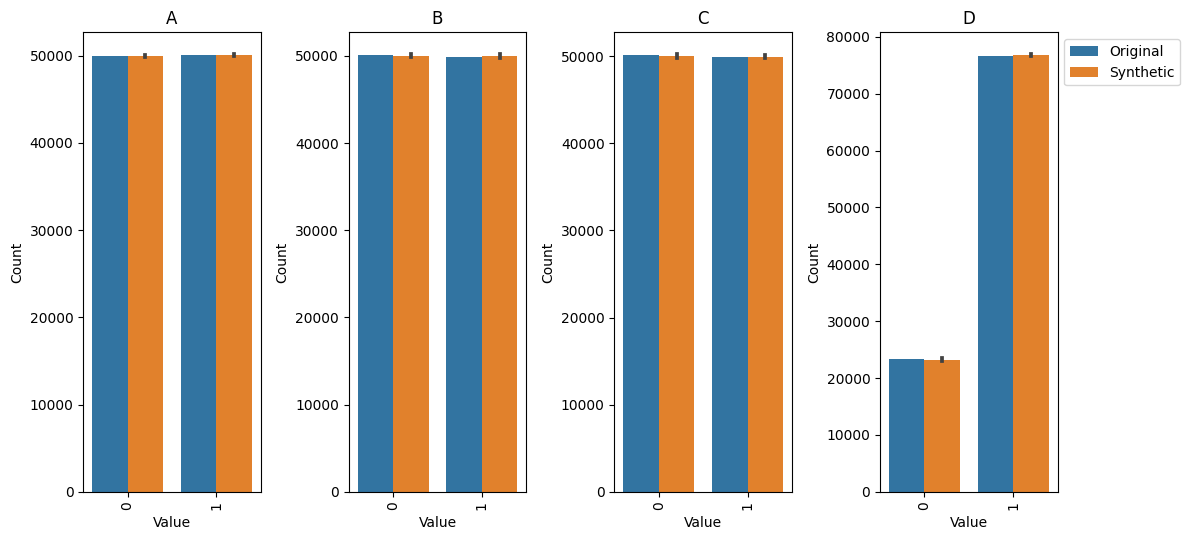

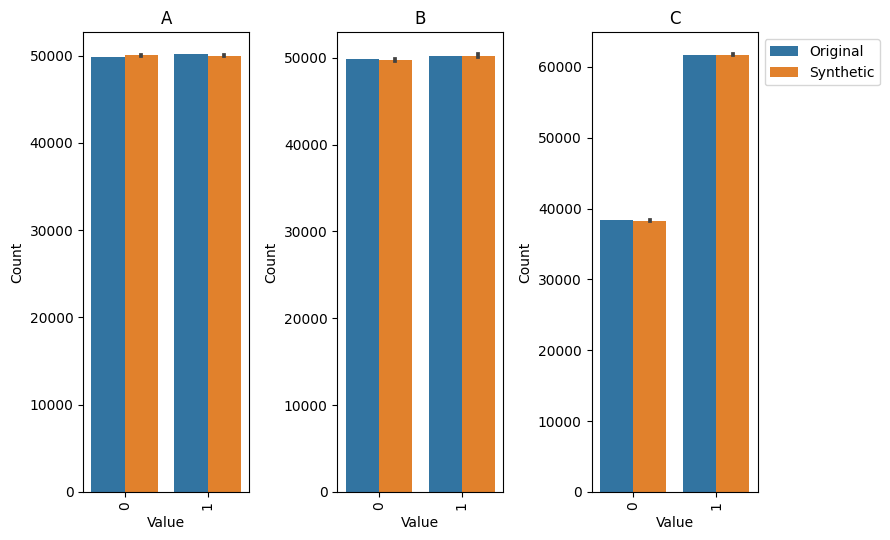

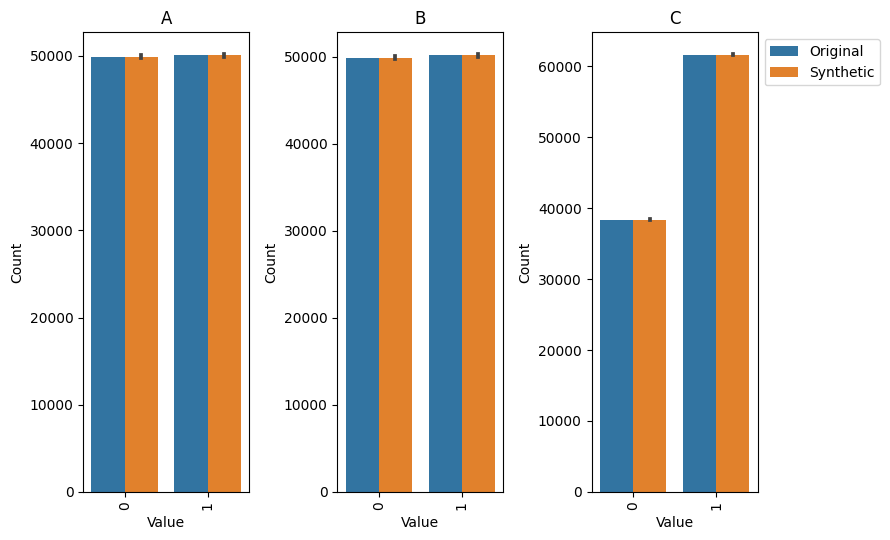

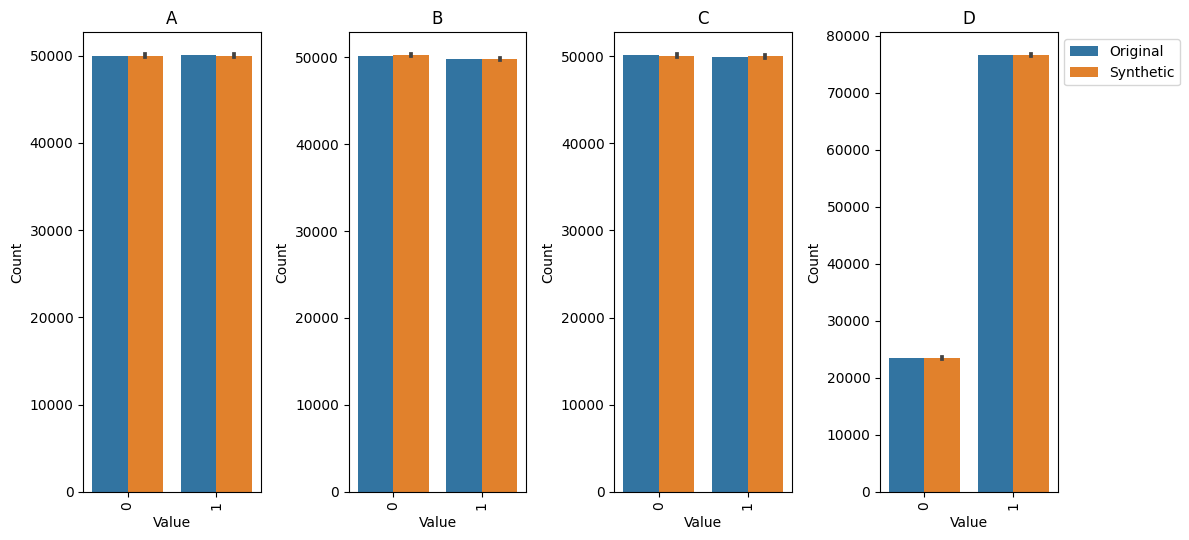

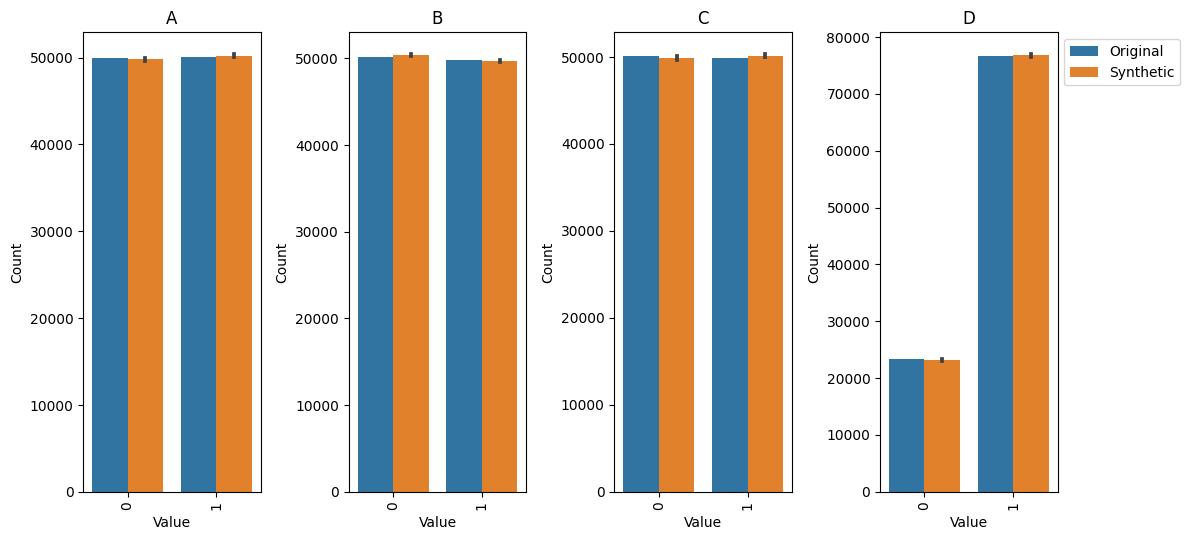

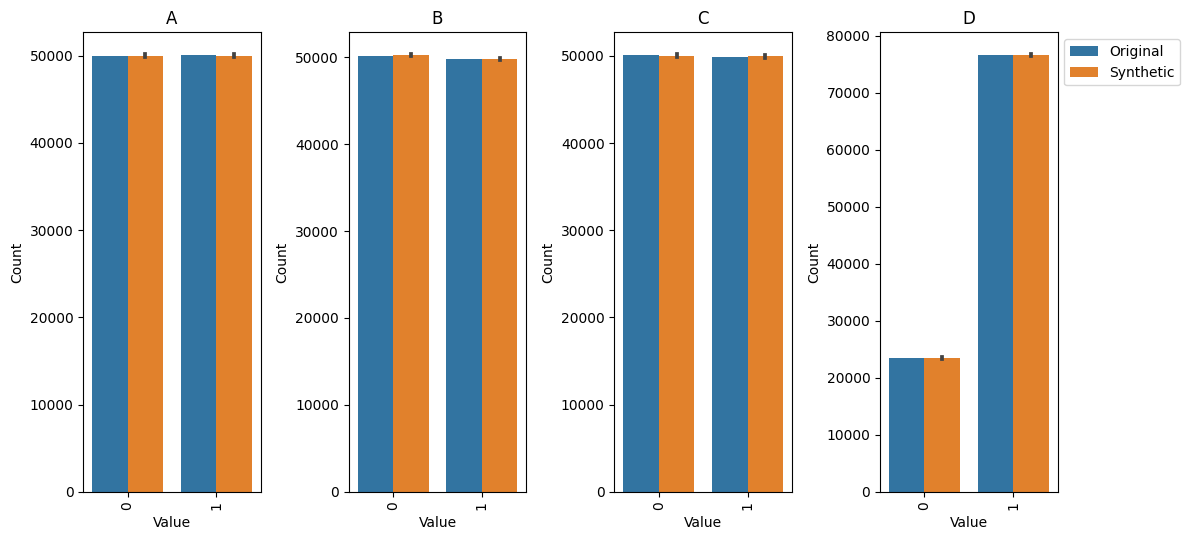

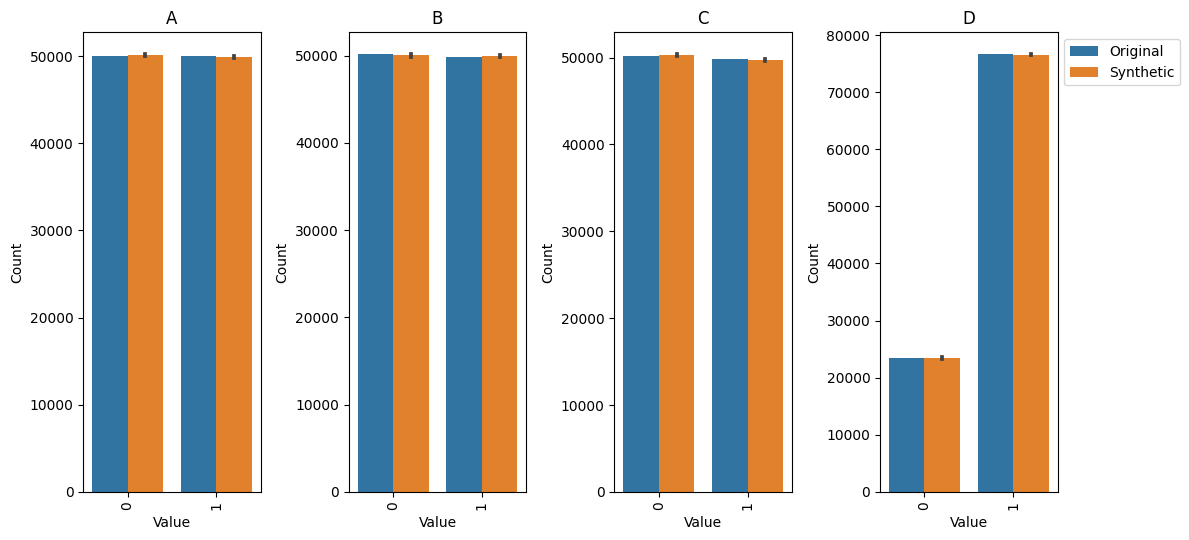

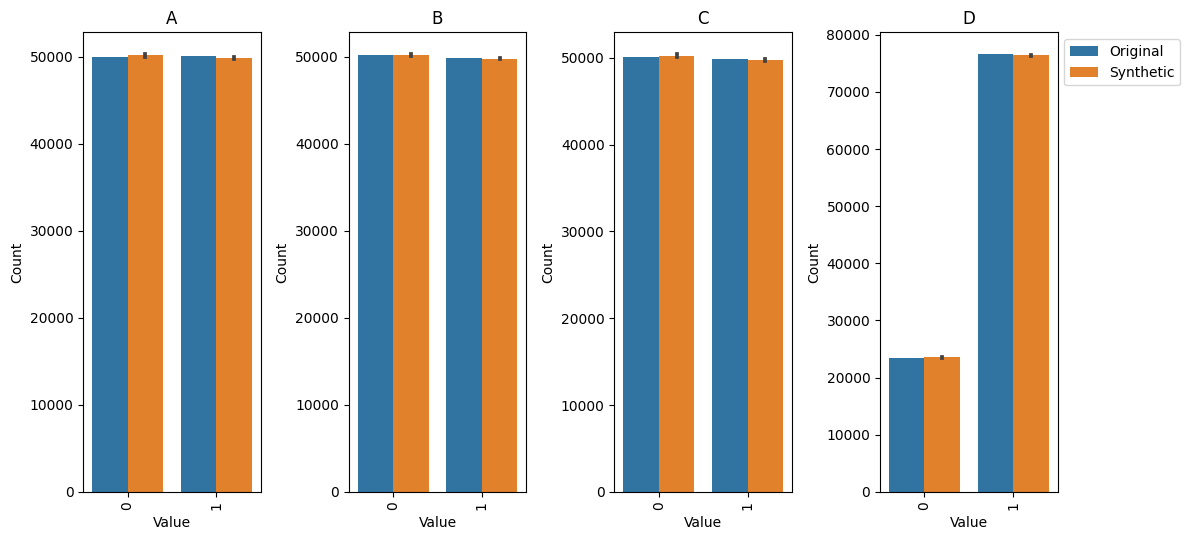

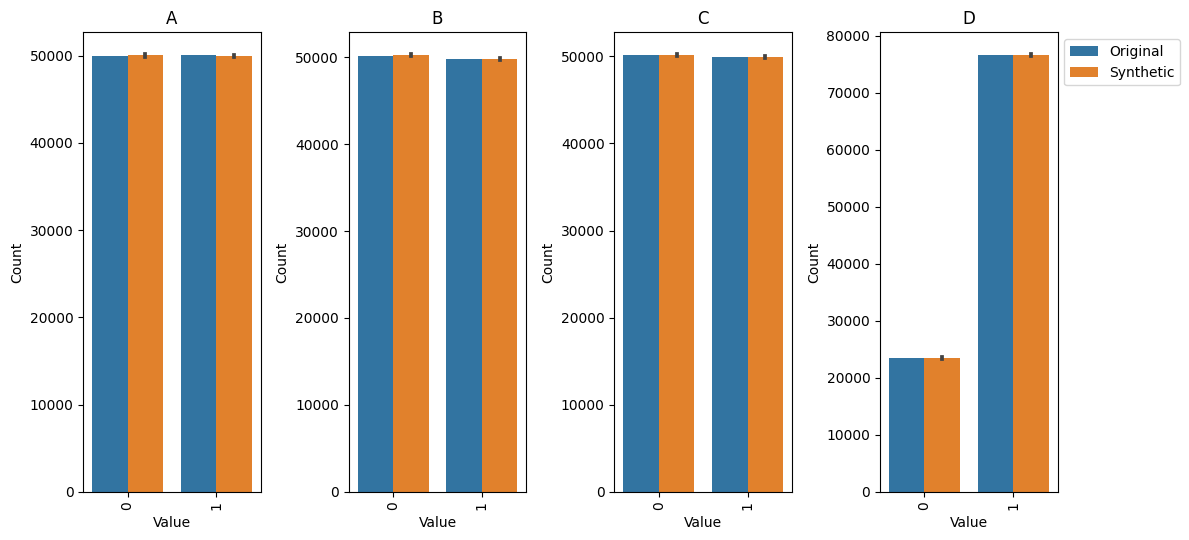

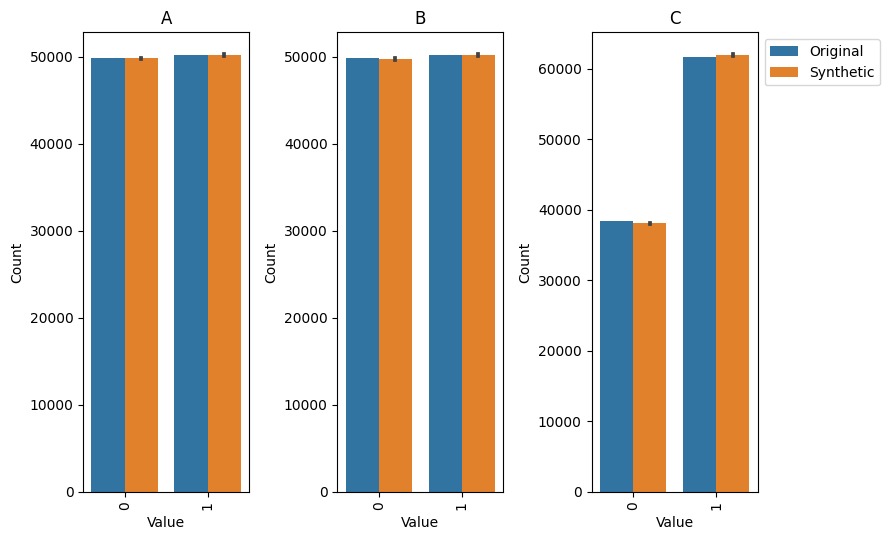

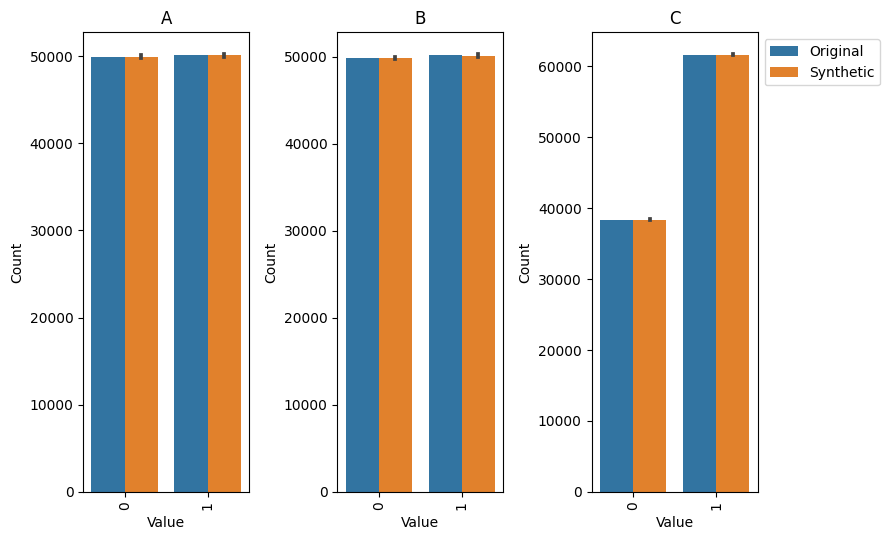

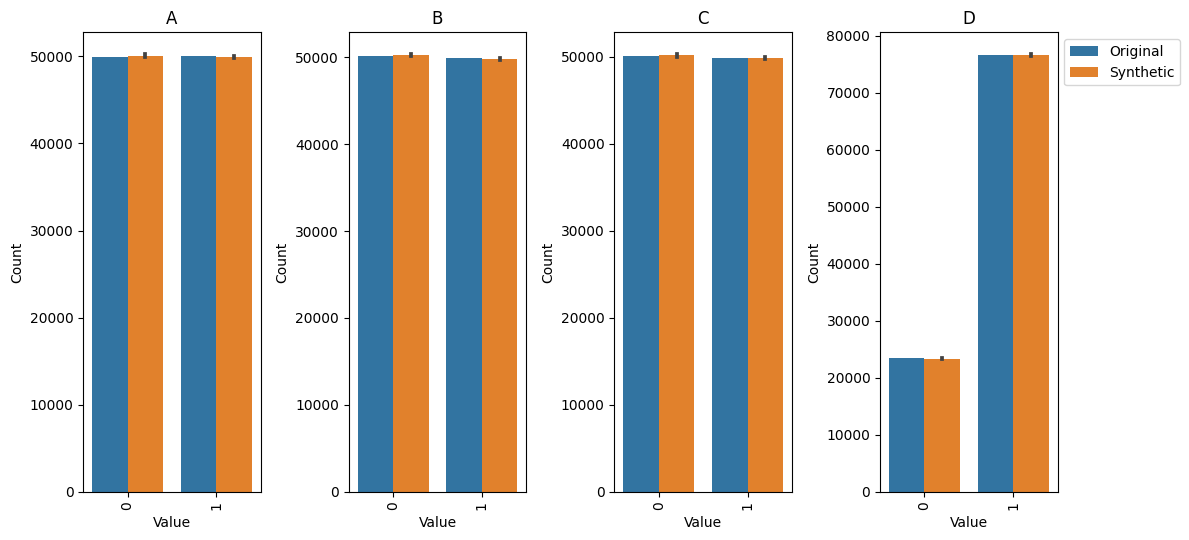

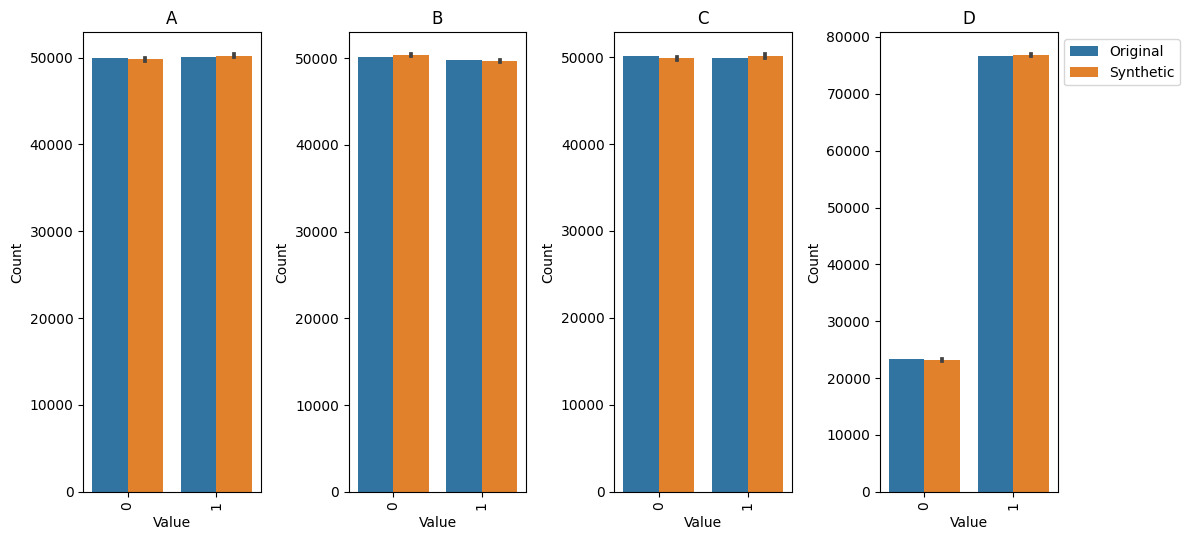

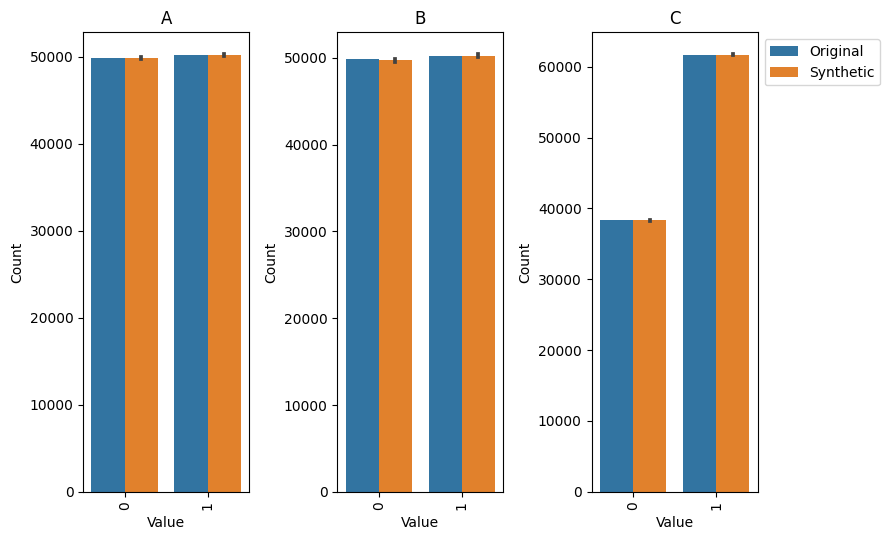

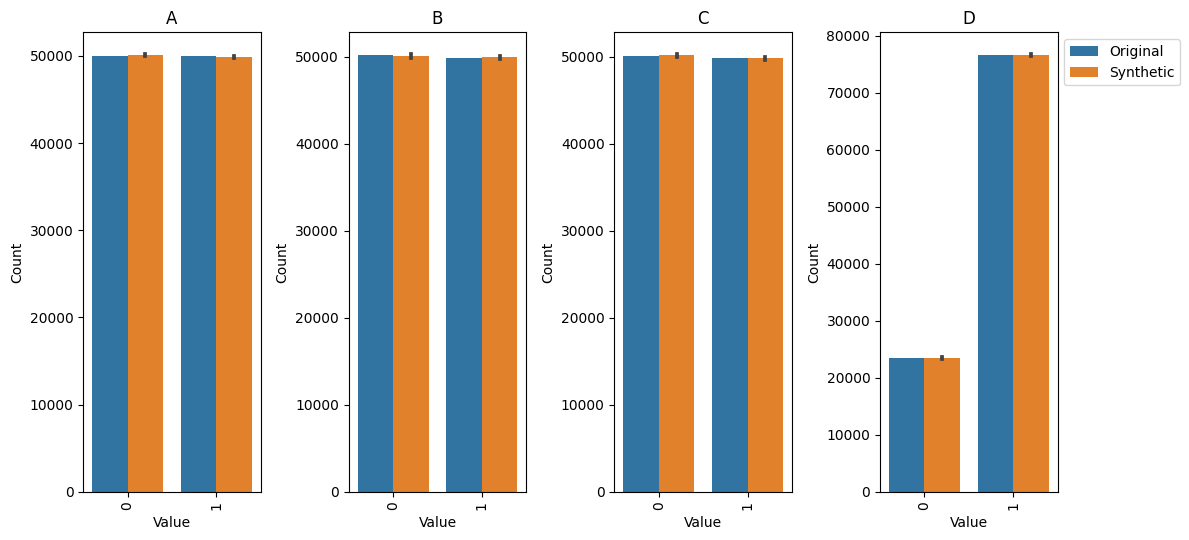

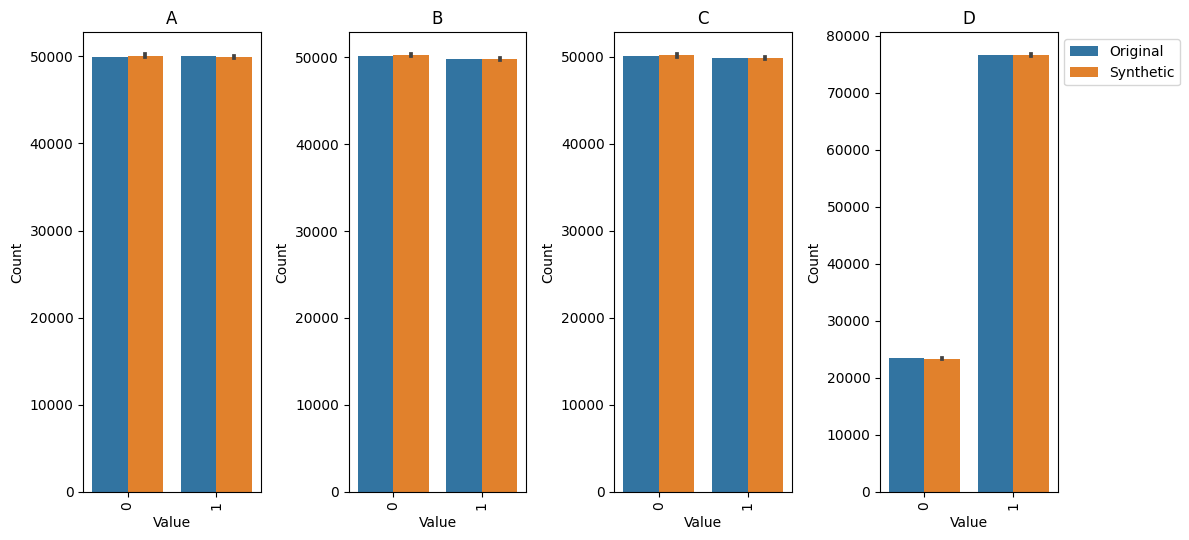

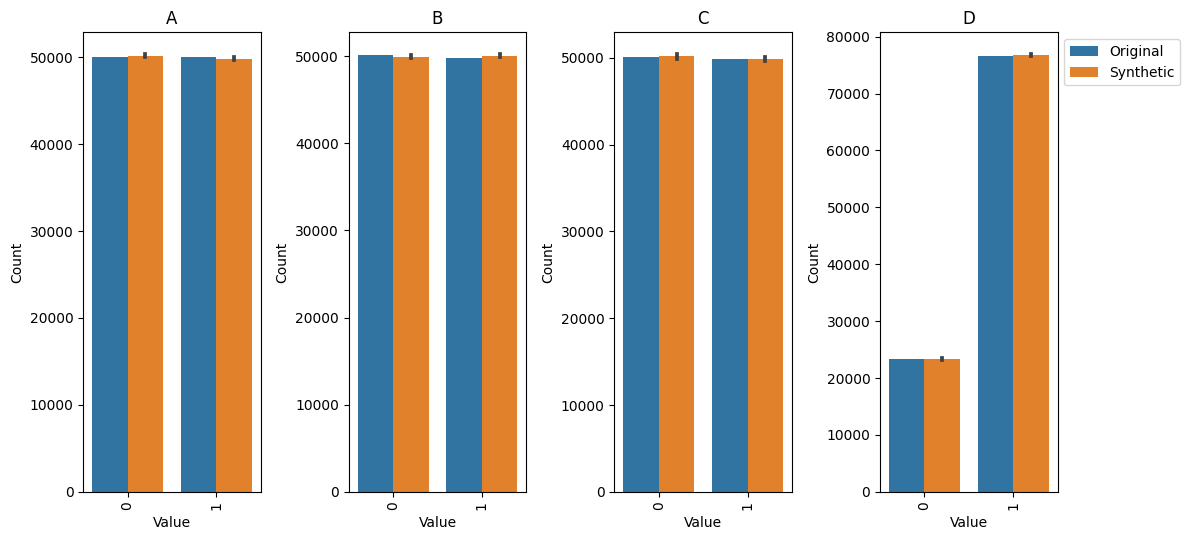

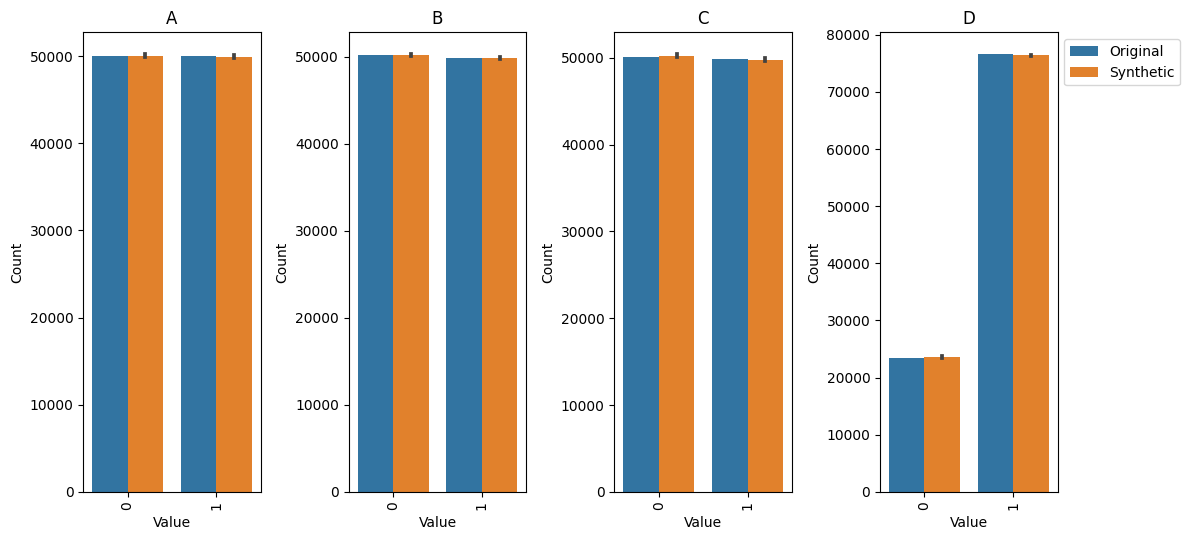

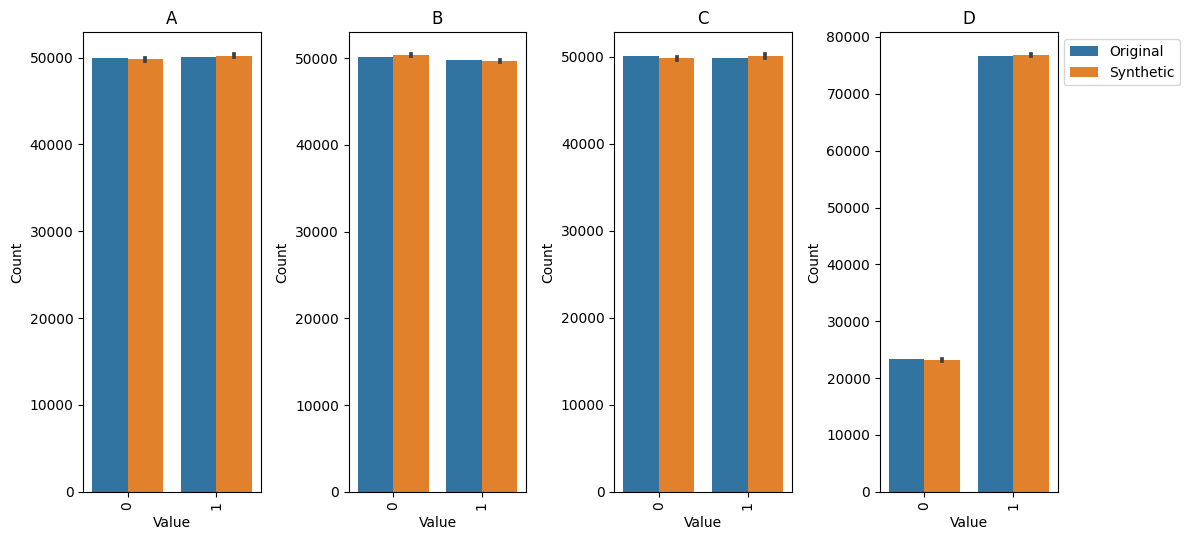

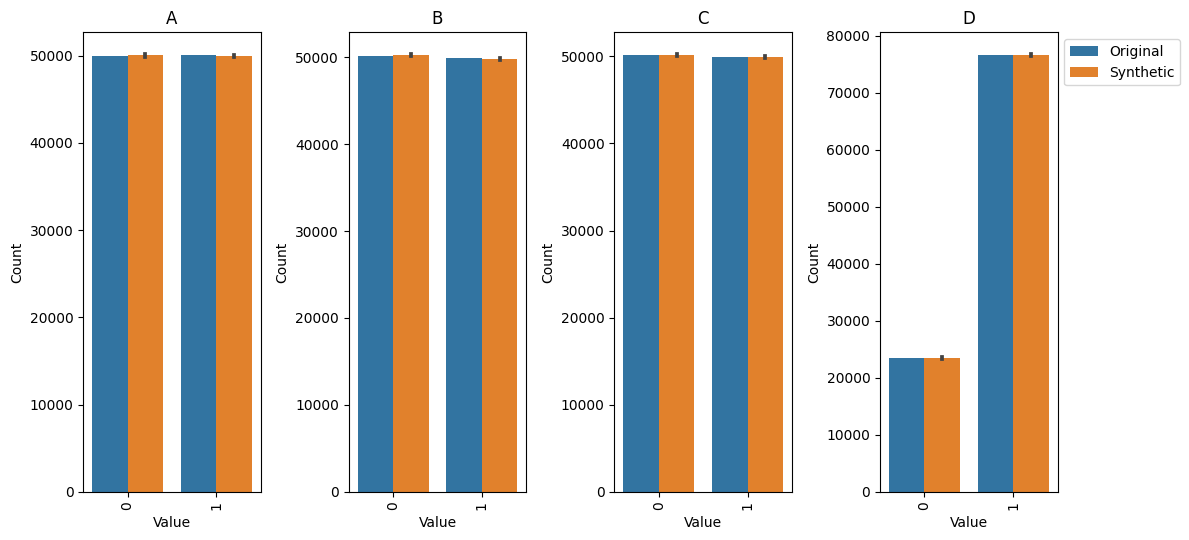

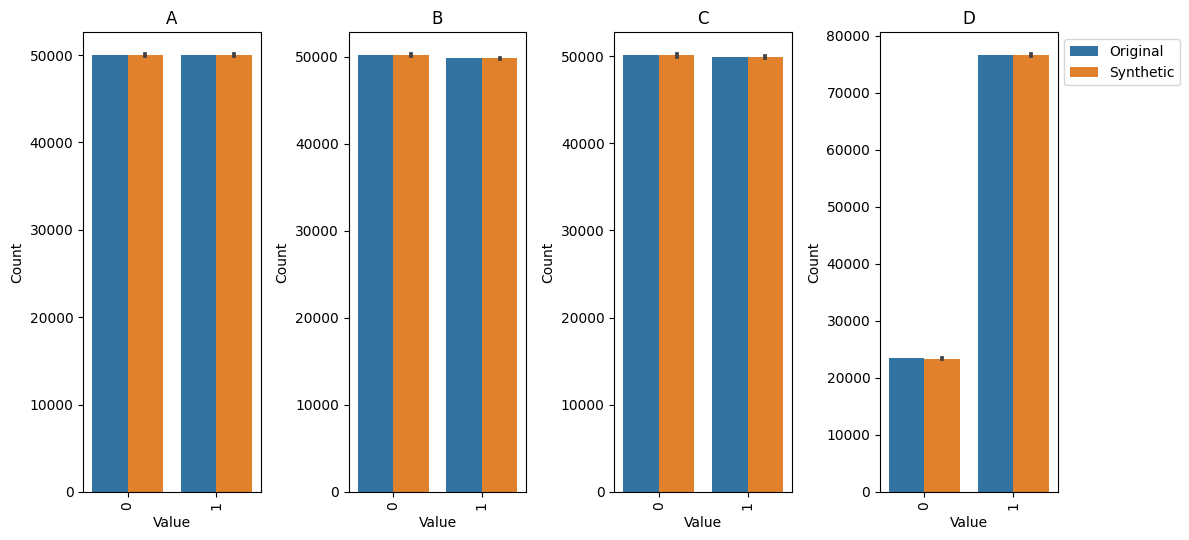

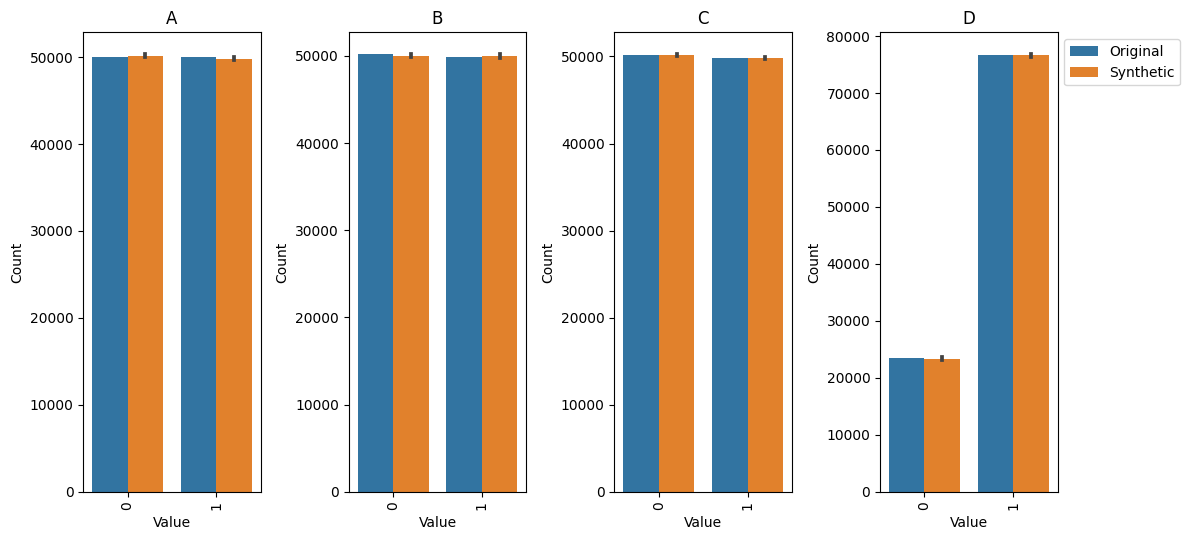

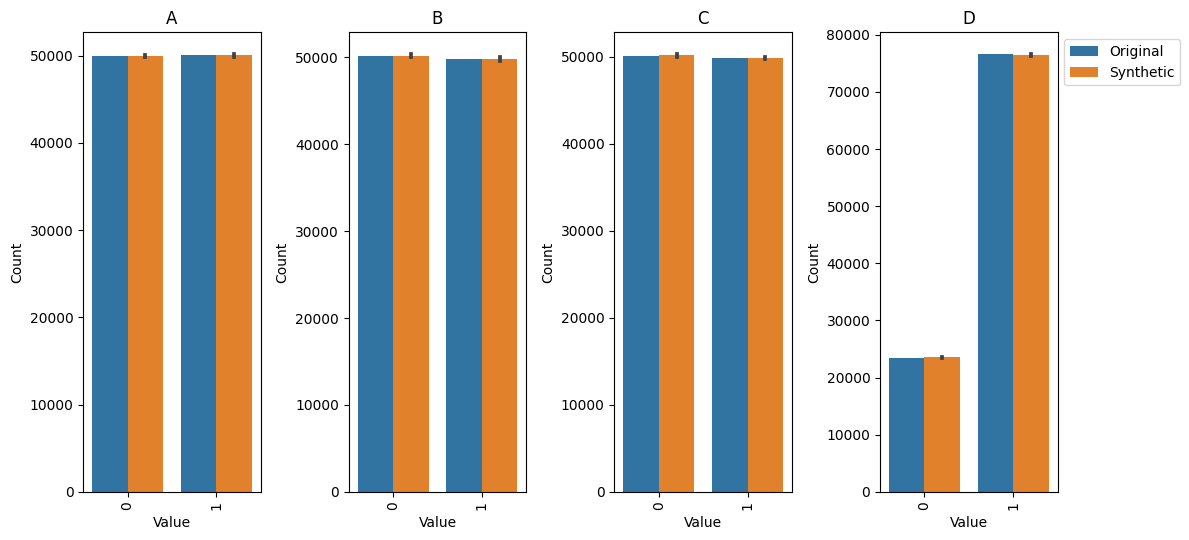

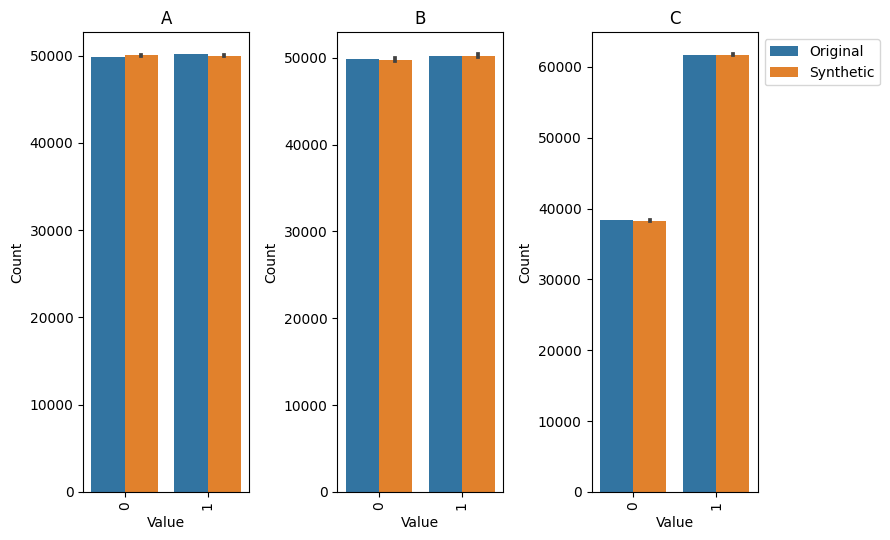

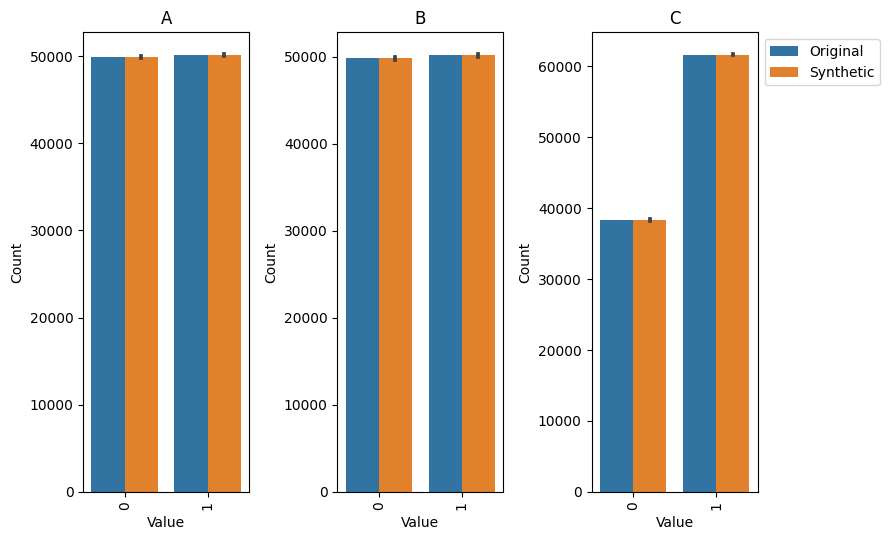

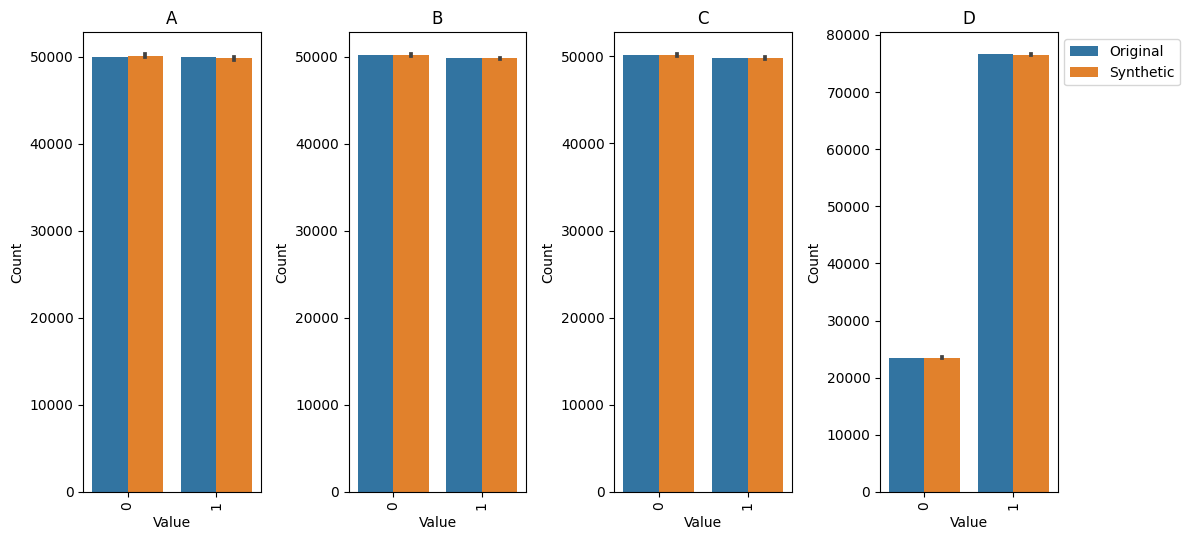

In [37]:
for filename in os.listdir(SYN_DATA_FOLDER):
    if filename[0] == '.':
        continue
    
    synt_data_obj_path = os.path.join(SYN_DATA_FOLDER, filename)
    synt_data_obj = pickle.load(open(synt_data_obj_path, mode="rb"))
    
    original_dataset = synt_data_obj.original_dataset
            
    if original_dataset == 'binary3d':
        df_list = numpy_tensor_to_dataframe_list(synt_data_obj.synth_data, columns=['A', 'B', 'C'])
        plot_dataframe_marginal_comparison(binary3d_df, df_list)
        
    elif original_dataset == 'binary4d':
        df_list = numpy_tensor_to_dataframe_list(synt_data_obj.synth_data, columns=['A', 'B', 'C', 'D'])
        plot_dataframe_marginal_comparison(binary4d_df, df_list)
    else:
        print(f"Unknown dataset: {original_dataset}")
    